<a href="https://colab.research.google.com/github/Priyanka2508/Singapore-Flat-Resale-Price-Prediction/blob/main/Singapore_Preprocessing_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import re
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')


In [2]:
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
168473  2023-12      YISHUN  EXECUTIVE   606      YISHUN ST 61     07 TO 09   
168474  2023-12      YISHUN  EXECUTIVE   643      YISHUN ST 61     10 TO 12   
168475  2023-12      YISHUN  EXECUTIVE   643      YISHUN ST 61     10 TO 12   
168476  2023-12      YISHUN  EXECUTIVE   826      YISHUN ST 81     01 TO 03   
168477  2023-12      YISHUN  EXECUTIVE   834      YISHUN ST 81     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
168473           142.0       Apartment                 1987      788888.0   
168474           146.0      Maisonette                 1987      838000.0   
168475           142.0       Apartment                 1987      755000.0   
168476           142.0       Apartment                 1988      780000.0   
168477           142.0       Apartment                 1988      785000.0   

           remaining_lease  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
168473   63 years 01 month  
168474  62 years 10 months  
168475  62 years 10 months  
168476  63 years 02 months  
168477  63 years 02 months  

[914681 rows x 11 columns]

In [3]:
df.describe().T

count           mean            std     min       25%  \
floor_area_sqm       914681.0      95.697147      25.849534    28.0      73.0   
lease_commence_date  914681.0    1988.139603      10.522351  1966.0    1981.0   
resale_price         914681.0  317037.740320  167234.816611  5000.0  191000.0   

                          50%       75%        max  
floor_area_sqm           93.0     113.0      307.0  
lease_commence_date    1986.0    1996.0     2022.0  
resale_price         295000.0  412000.0  1500000.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914681 entries, 0 to 168477
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.7+ MB


In [ ]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [3]:
df_c = df
df_new = df.drop('remaining_lease', axis=1)
df_new
df_new.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [6]:
df_new.describe()

floor_area_sqm  lease_commence_date  resale_price
count   914681.000000        914681.000000  9.146810e+05
mean        95.697147          1988.139603  3.170377e+05
std         25.849534            10.522351  1.672348e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.910000e+05
50%         93.000000          1986.000000  2.950000e+05
75%        113.000000          1996.000000  4.120000e+05
max        307.000000          2022.000000  1.500000e+06

In [7]:
df_new.shape

(914681, 10)

In [6]:
data = df_new.drop(['block','street_name','month',],axis =1)
data

town  flat_type storey_range  floor_area_sqm      flat_model  \
0       ANG MO KIO     1 ROOM     10 TO 12            31.0        IMPROVED   
1       ANG MO KIO     1 ROOM     04 TO 06            31.0        IMPROVED   
2       ANG MO KIO     1 ROOM     10 TO 12            31.0        IMPROVED   
3       ANG MO KIO     1 ROOM     07 TO 09            31.0        IMPROVED   
4       ANG MO KIO     3 ROOM     04 TO 06            73.0  NEW GENERATION   
...            ...        ...          ...             ...             ...   
168473      YISHUN  EXECUTIVE     07 TO 09           142.0       Apartment   
168474      YISHUN  EXECUTIVE     10 TO 12           146.0      Maisonette   
168475      YISHUN  EXECUTIVE     10 TO 12           142.0       Apartment   
168476      YISHUN  EXECUTIVE     01 TO 03           142.0       Apartment   
168477      YISHUN  EXECUTIVE     01 TO 03           142.0       Apartment   

        lease_commence_date  resale_price  
0                      1977        9000.0  
1                      1977        6000.0  
2                      1977        8000.0  
3                      1977        6000.0  
4                      1976       47200.0  
...                     ...           ...  
168473                 1987      788888.0  
168474                 1987      838000.0  
168475                 1987      755000.0  
168476                 1988      780000.0  
168477                 1988      785000.0  

[914681 rows x 7 columns]

In [13]:
data.describe()

floor_area_sqm  lease_commence_date  resale_price
count   914681.000000        914681.000000  9.146810e+05
mean        95.697147          1988.139603  3.170377e+05
std         25.849534            10.522351  1.672348e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.910000e+05
50%         93.000000          1986.000000  2.950000e+05
75%        113.000000          1996.000000  4.120000e+05
max        307.000000          2022.000000  1.500000e+06

In [ ]:
data['flat_model'].value_counts()

Model A                   189743
Improved                  165296
New Generation            108630
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45537
Simplified                 33858
Apartment                  25200
Standard                   24894
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17134
MAISONETTE                 12215
Model A2                    9994
APARTMENT                   9901
DBSS                        3176
Adjoined flat               1232
Model A-Maisonette          1074
MODEL A-MAISONETTE           982
Terrace                      441
Type S1                      429
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      211
Premium Apartment Loft       103
Premium Maisonette            86
2-room                        85
Improved-Maisonette           81
IMPROVED-M

In [ ]:
data['flat_type'].value_counts()

4 ROOM              346975
3 ROOM              292927
5 ROOM              192584
EXECUTIVE            68892
2 ROOM               11465
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       259
Name: flat_type, dtype: int64

In [ ]:
data['town'].value_counts()

TAMPINES           79087
YISHUN             69209
BEDOK              66050
JURONG WEST        65771
WOODLANDS          64637
ANG MO KIO         51627
HOUGANG            50031
BUKIT BATOK        43639
CHOA CHU KANG      37749
BUKIT MERAH        33887
PASIR RIS          32910
SENGKANG           31580
TOA PAYOH          31193
QUEENSTOWN         28473
GEYLANG            27928
CLEMENTI           27784
BUKIT PANJANG      27317
KALLANG/WHAMPOA    26813
JURONG EAST        24516
SERANGOON          22625
BISHAN             21108
PUNGGOL            19746
SEMBAWANG          13397
MARINE PARADE       7984
CENTRAL AREA        7070
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: town, dtype: int64

In [7]:
data['flat_model'] = data['flat_model'].replace({
    'MODEL A':'Model A',
    'IMPROVED': 'Improved',
    'NEW GENERATION': 'New Generation',
    'SIMPLIFIED': 'Simplified',
    'APARTMENT': 'Apartment',
    'STANDARD': 'Standard',
    'MAISONETTE': 'Maisonette',
    'MODEL A-MAISONETTE': 'Model A-Maisonette',
    'TERRACE': 'Terrace',
    'MULTI GENERATION': 'Multi Generation',
    '2-ROOM': '2-room',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'IMPROVED-MAISONETTE': 'Improved-Maisonette'
})

In [8]:
data['flat_model'].value_counts()

Model A                   260124
Improved                  238885
New Generation            187528
Simplified                 57116
Premium Apartment          45543
Standard                   42269
Apartment                  35101
Maisonette                 29349
Model A2                    9994
DBSS                        3176
Model A-Maisonette          2056
Adjoined flat               1232
Terrace                      688
Multi Generation             538
Type S1                      429
Type S2                      211
Improved-Maisonette          125
2-room                       106
Premium Apartment Loft       103
Premium Maisonette            86
3Gen                          22
Name: flat_model, dtype: int64

In [9]:
data['flat_type'] = data['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [ ]:
data['flat_type'].value_counts()

4 ROOM              346975
3 ROOM              292927
5 ROOM              192584
EXECUTIVE            68892
2 ROOM               11465
1 ROOM                1300
MULTI-GENERATION       538
Name: flat_type, dtype: int64

In [ ]:
df_new['storey_range'].unique()

04 TO 06    229734
07 TO 09    207521
01 TO 03    184201
10 TO 12    176567
13 TO 15     60803
16 TO 18     23632
19 TO 21     11175
22 TO 24      7284
25 TO 27      3338
01 TO 05      2700
06 TO 10      2474
28 TO 30      1588
11 TO 15      1259
31 TO 33       590
34 TO 36       550
37 TO 39       494
16 TO 20       265
40 TO 42       237
21 TO 25        92
43 TO 45        64
46 TO 48        48
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [11]:
data['storey_range'] = data['storey_range'].apply(lambda x:((int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2))
data['storey_range'].value_counts()
data.describe()

storey_range  floor_area_sqm  lease_commence_date  resale_price
count  914681.000000   914681.000000        914681.000000  9.146810e+05
mean        7.676387       95.697147          1988.139603  3.170377e+05
std         4.805656       25.849534            10.522351  1.672348e+05
min         2.000000       28.000000          1966.000000  5.000000e+03
25%         5.000000       73.000000          1981.000000  1.910000e+05
50%         8.000000       93.000000          1986.000000  2.950000e+05
75%        11.000000      113.000000          1996.000000  4.120000e+05
max        50.000000      307.000000          2022.000000  1.500000e+06

In [17]:
!pip install seaborn
!pip install matplotlib

Lets check the count of storey range, town, flat type and flat model

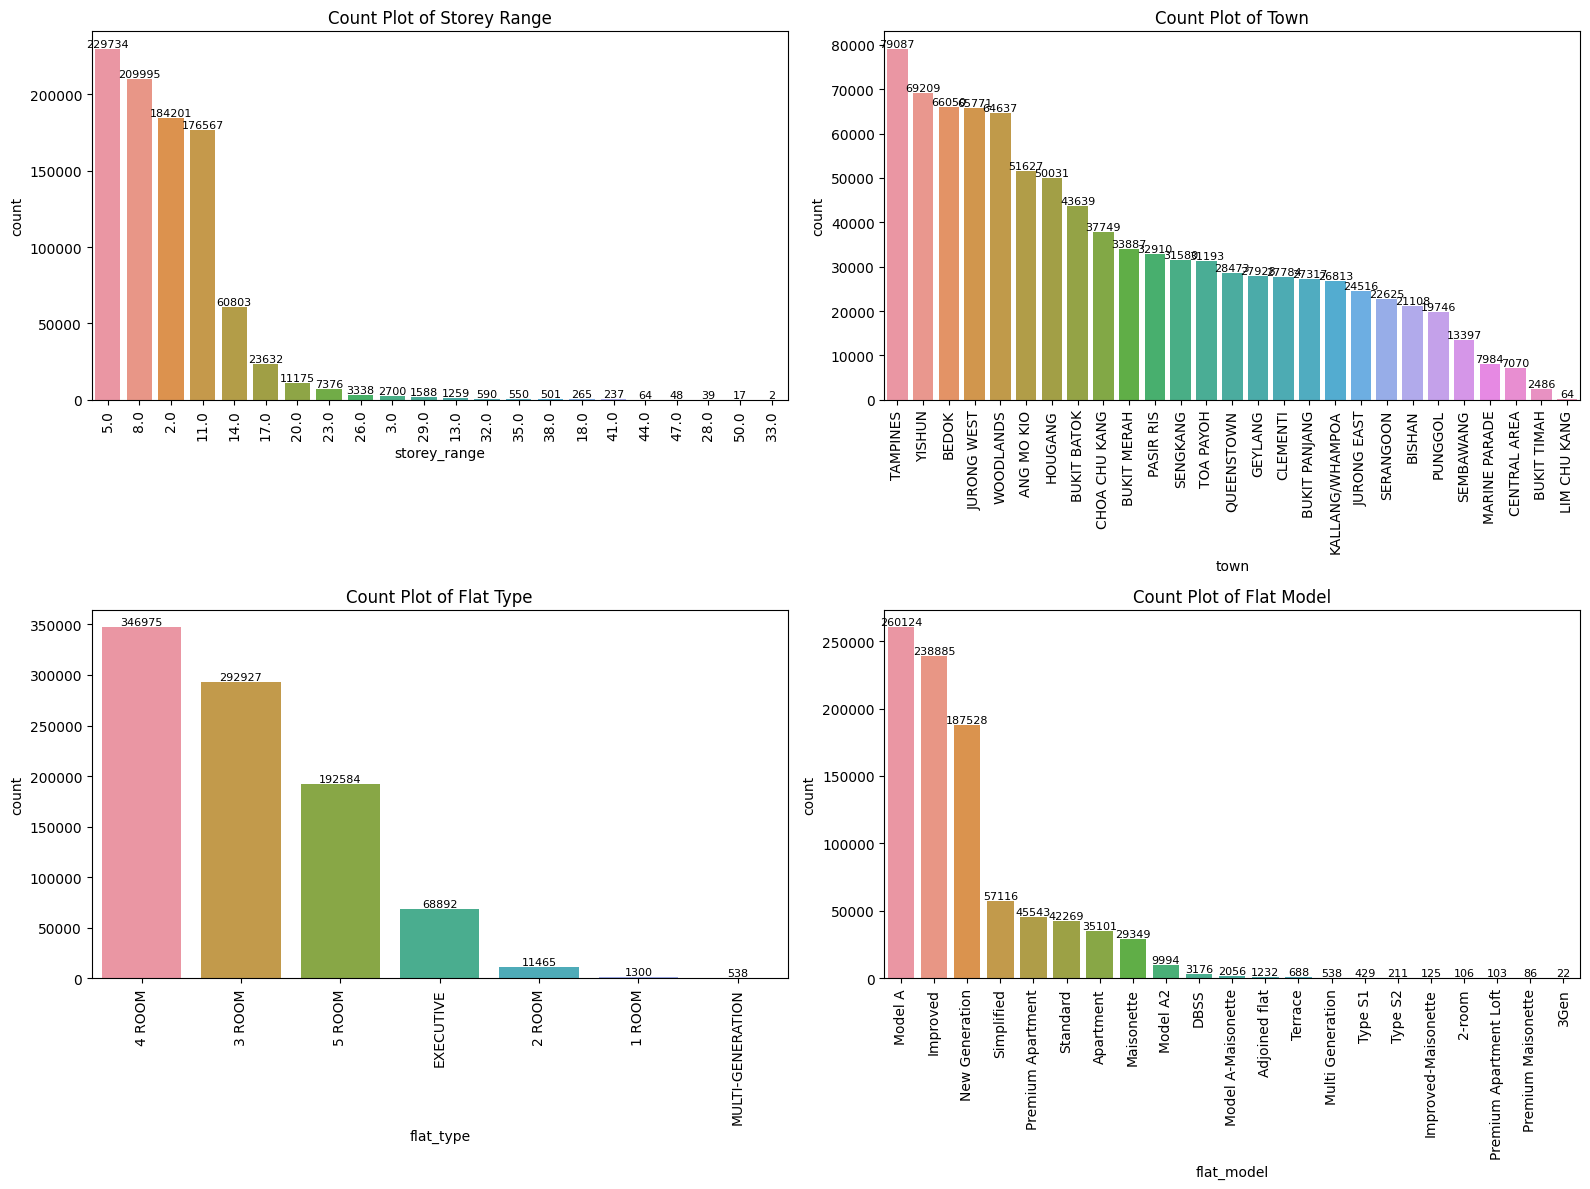

In [12]:

plt.figure(figsize=(16, 12))

# Count plot for storey_range
plt.subplot(2, 2, 1)
storey_range_order = data['storey_range'].value_counts().index
count_plot = sns.countplot(x='storey_range', data=data, order=storey_range_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Storey Range')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

# Count plot for town
plt.subplot(2, 2, 2)
town_order = data['town'].value_counts().sort_values(ascending=False).index
count_plot = sns.countplot(x='town', data=data, order=town_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Town')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

# Count plot for flat_type
plt.subplot(2, 2, 3)
flat_type_order = data['flat_type'].value_counts().sort_values(ascending=False).index
count_plot = sns.countplot(x='flat_type', data=data, order=flat_type_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Flat Type')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

# Count plot for flat_model
plt.subplot(2, 2, 4)
flat_model_order = data['flat_model'].value_counts().sort_values(ascending=False).index
count_plot = sns.countplot(x='flat_model', data=data, order=flat_model_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Flat Model')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Relationship amongst numerical variables

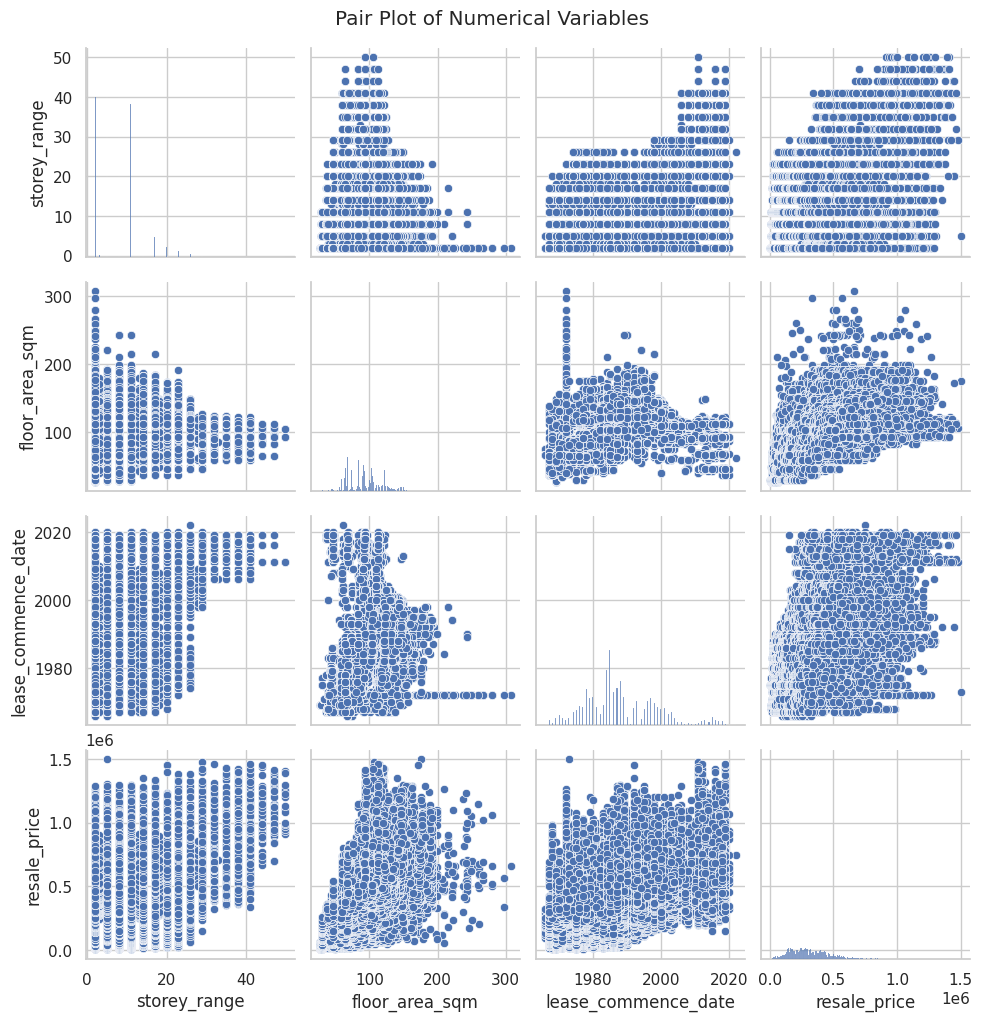

In [ ]:

# Create pair plot for numerical variables
sns.set(style="whitegrid")
numerical_variables = ['storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price']
sns.pairplot(data[numerical_variables])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


Checking town, flat type and flat model with respect to resale price

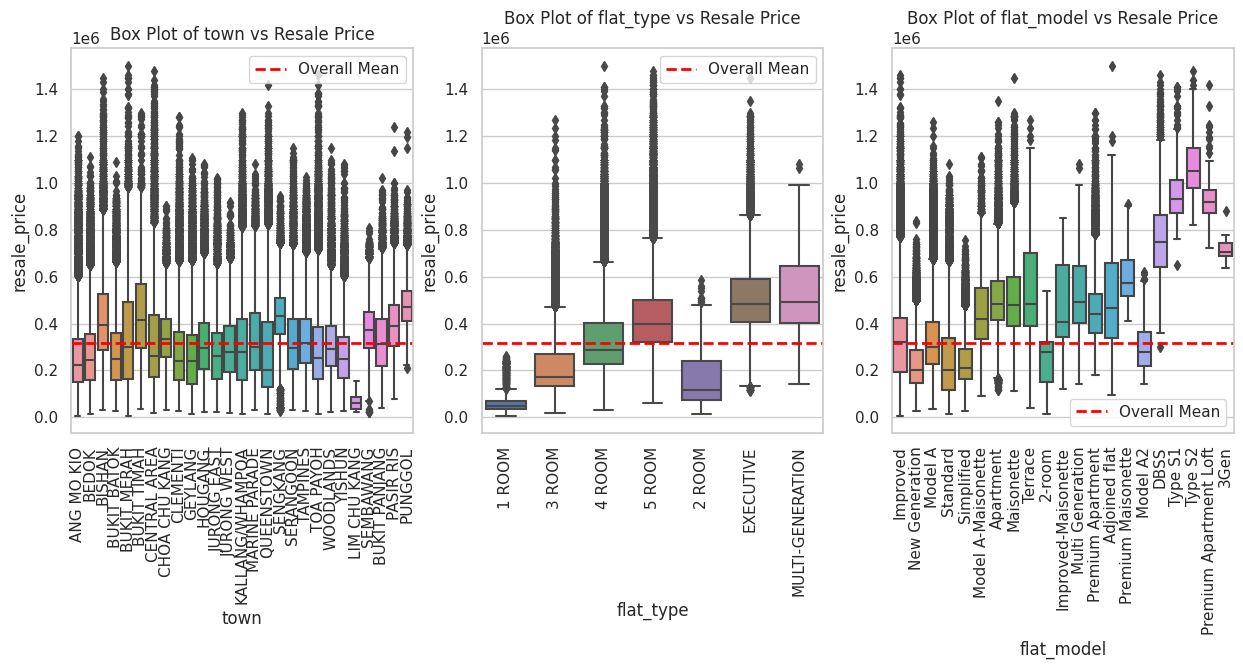

In [13]:
sns.set(style="whitegrid")
categorical_variables = ['town', 'flat_type', 'flat_model']

plt.figure(figsize=(15, 5))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 3, i)

    # Box plot
    sns.boxplot(x=variable, y='resale_price', data=data)

    # Overall mean line
    overall_mean = data['resale_price'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {variable} vs Resale Price')
    plt.legend()

plt.show()

**Checking town, flat type and flat model with respect to storey range**

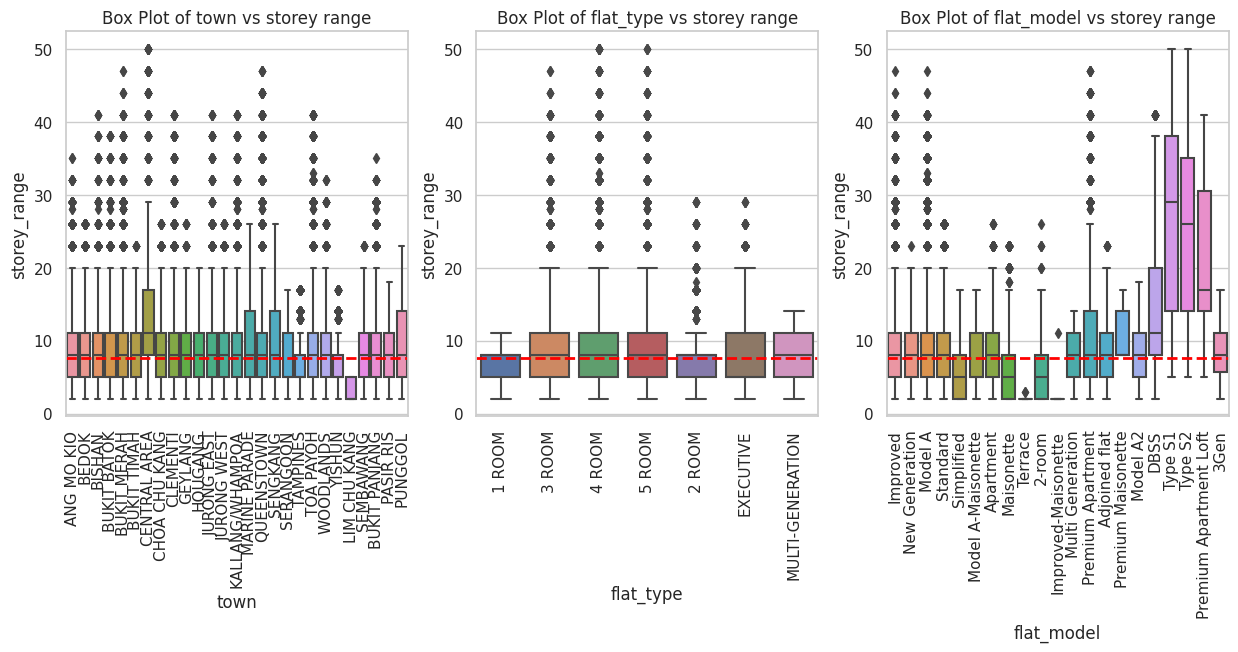

In [26]:

# Create box plots for categorical variables
sns.set(style="whitegrid")
categorical_variables = ['town', 'flat_type', 'flat_model']
plt.figure(figsize=(15, 5))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=variable, y='storey_range', data=data)

    # Overall mean line
    overall_mean = data['storey_range'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {variable} vs storey range')

plt.show()

**Checking town, flat type and flat model with respect to floor area**

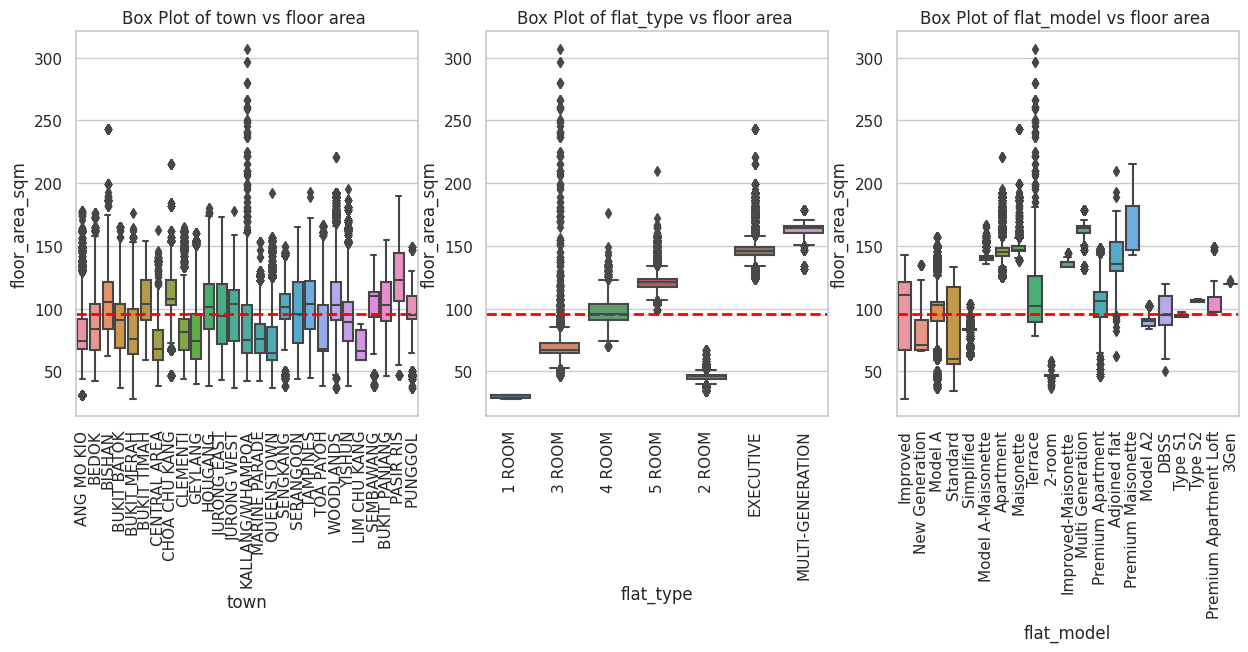

In [14]:

# Create box plots for categorical variables
sns.set(style="whitegrid")
categorical_variables = ['town', 'flat_type', 'flat_model']
plt.figure(figsize=(15, 5))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=variable, y='floor_area_sqm', data=data)

    # Overall mean line
    overall_mean = data['floor_area_sqm'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')


    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {variable} vs floor area ')

plt.show()

**Trend of resale price by flat type**

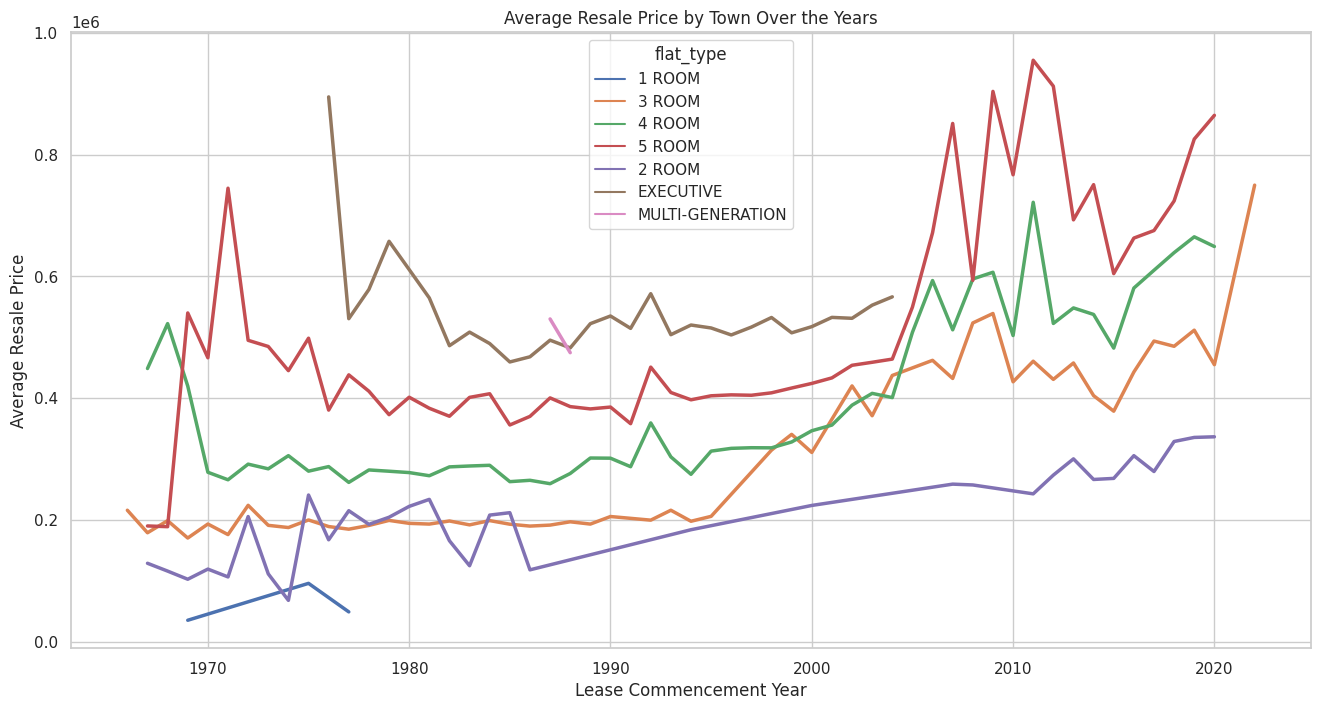

In [15]:

plt.figure(figsize=(16, 8))

# Line plot for average resale price by town over the years
sns.lineplot(x='lease_commence_date', y='resale_price', hue='flat_type', data=data, ci=None, linewidth=2.5)
plt.title('Average Resale Price by Town Over the Years')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Average Resale Price')

plt.show()

**Count and Distribution of flat type by town**

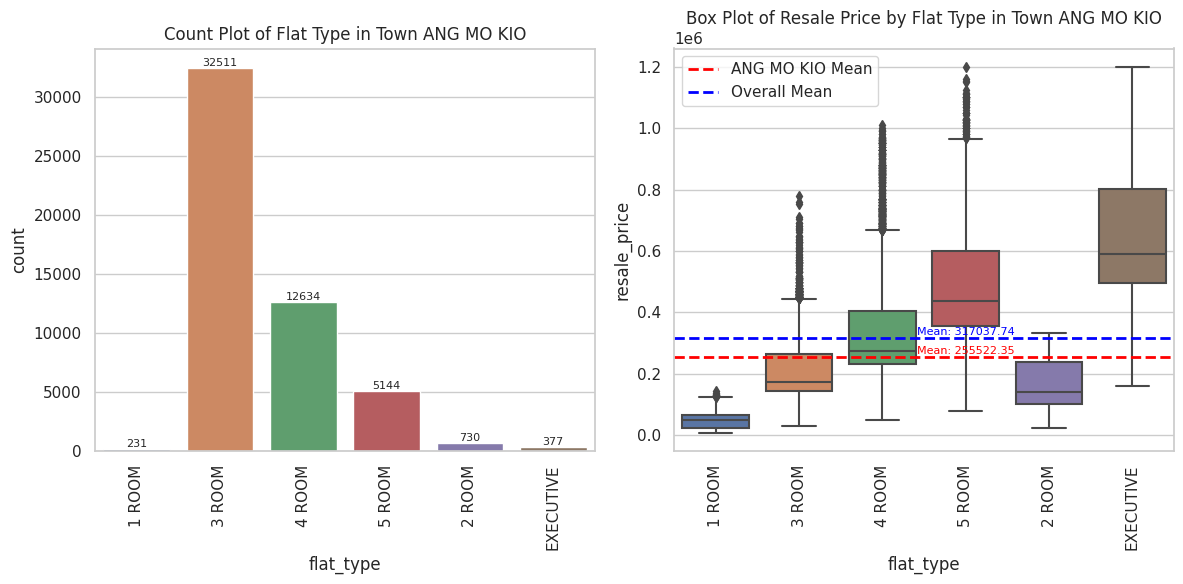

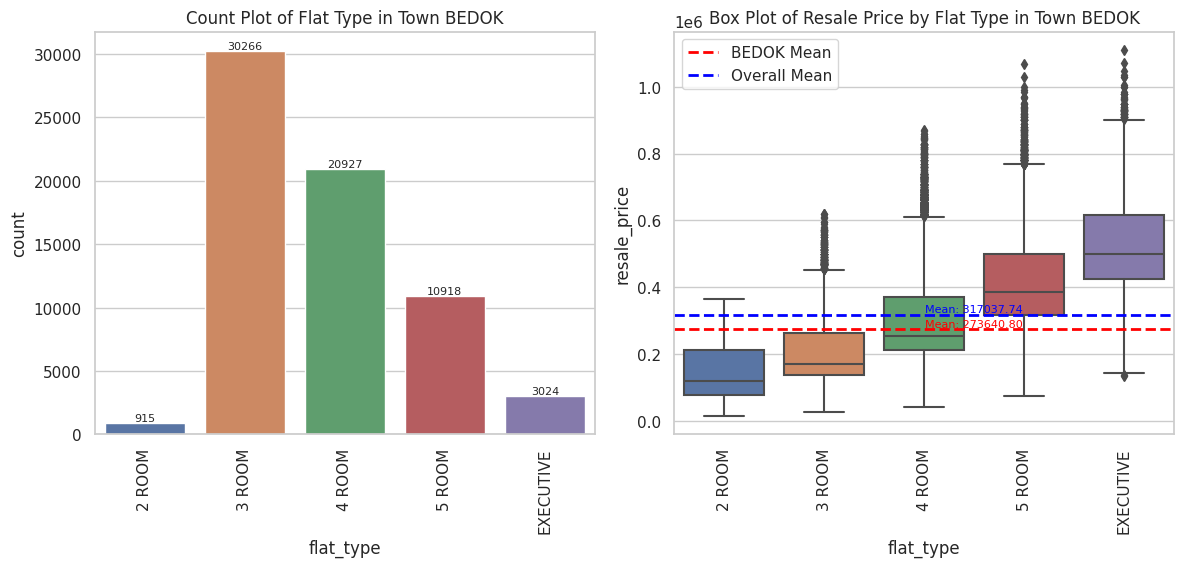

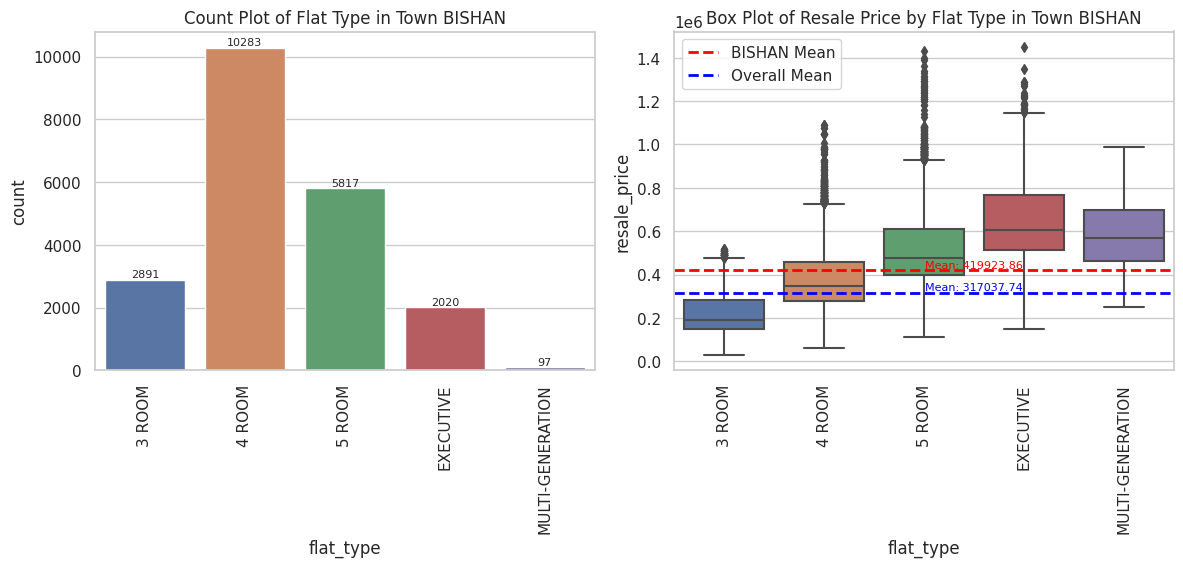

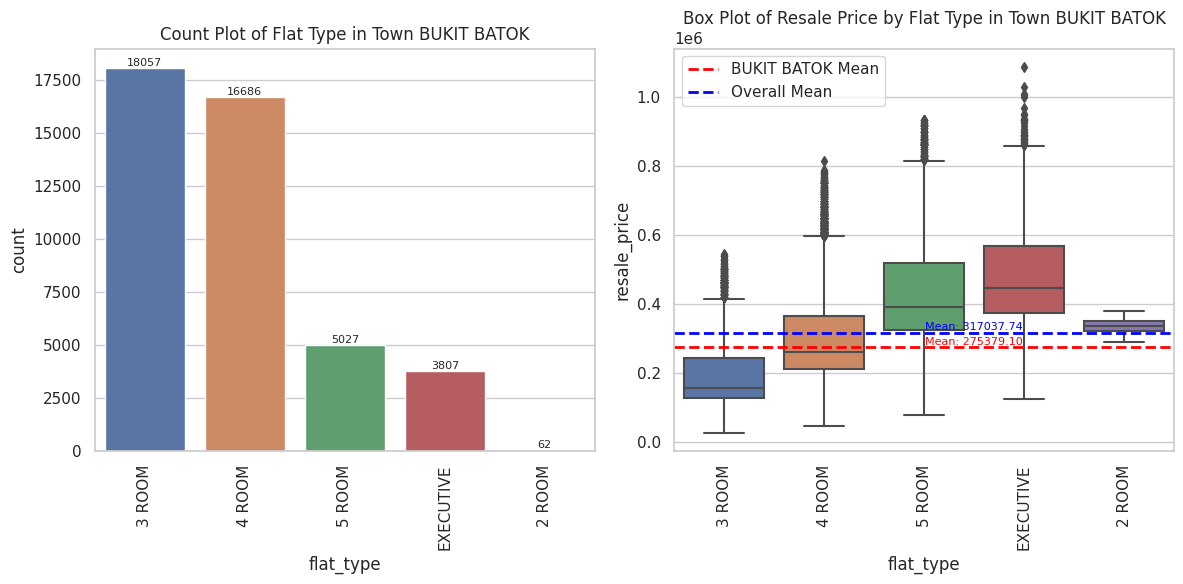

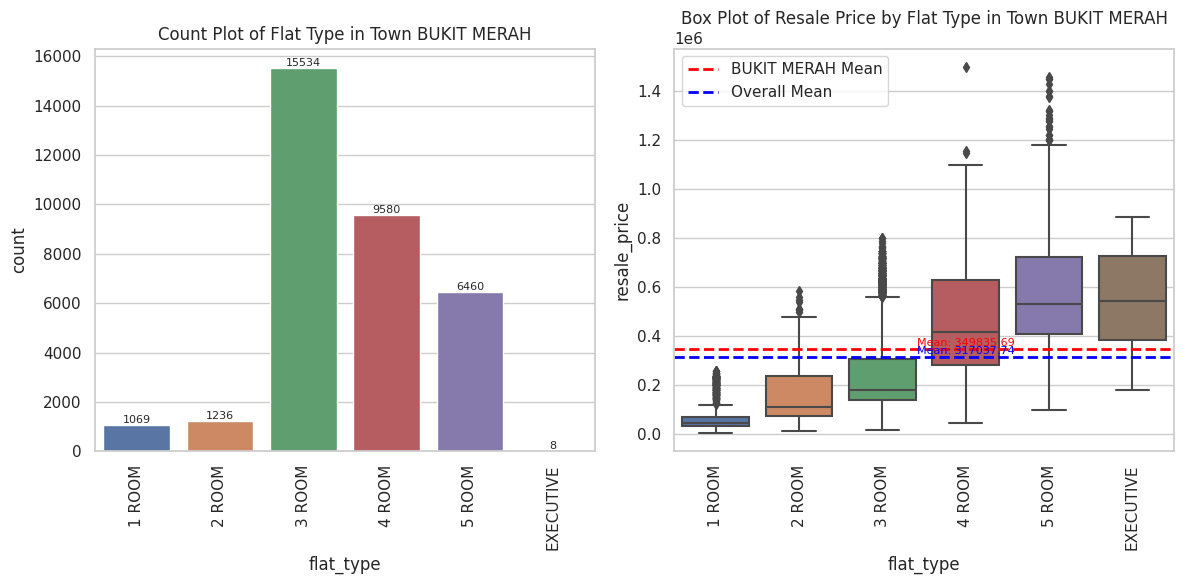

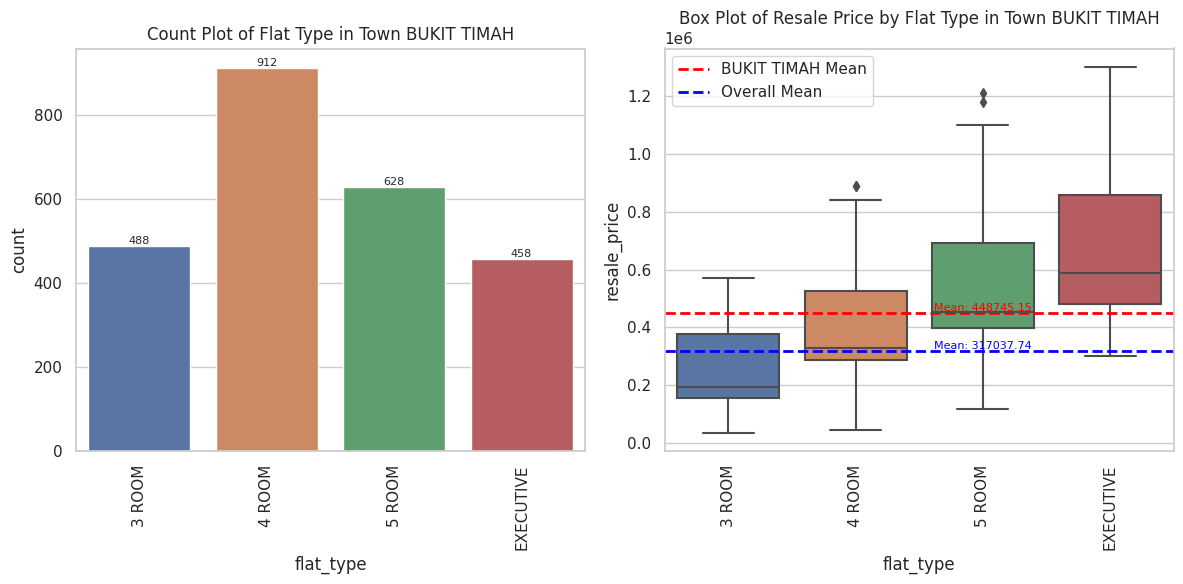

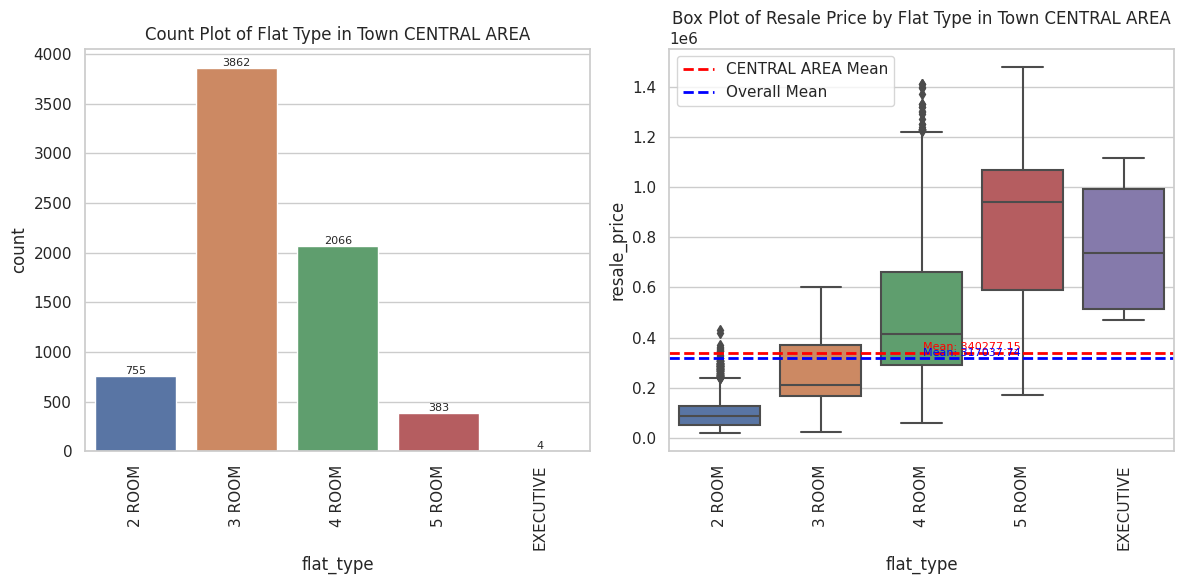

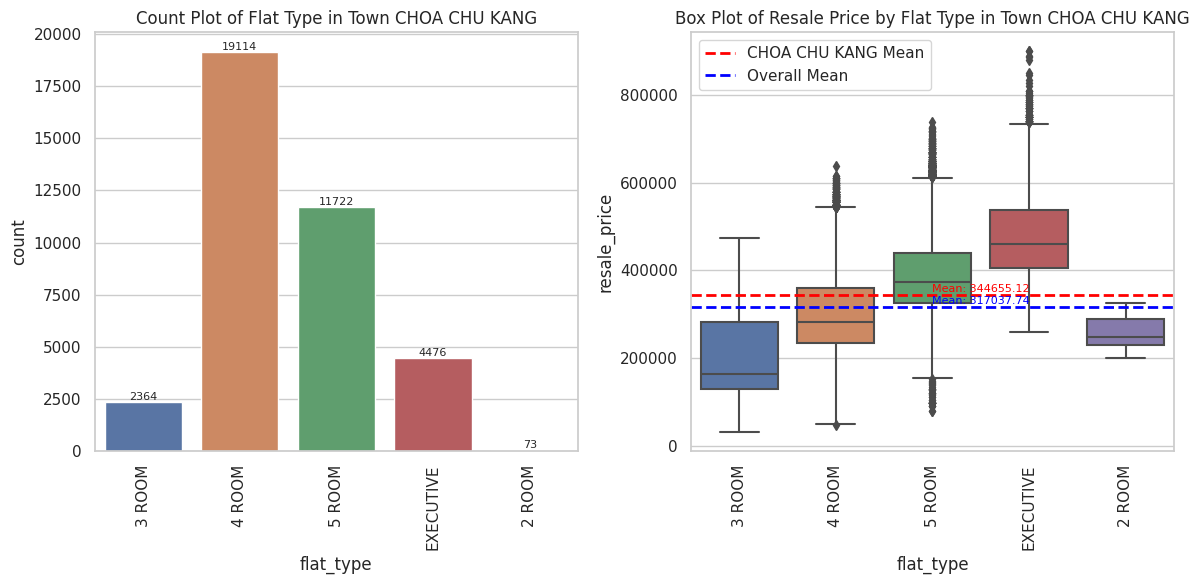

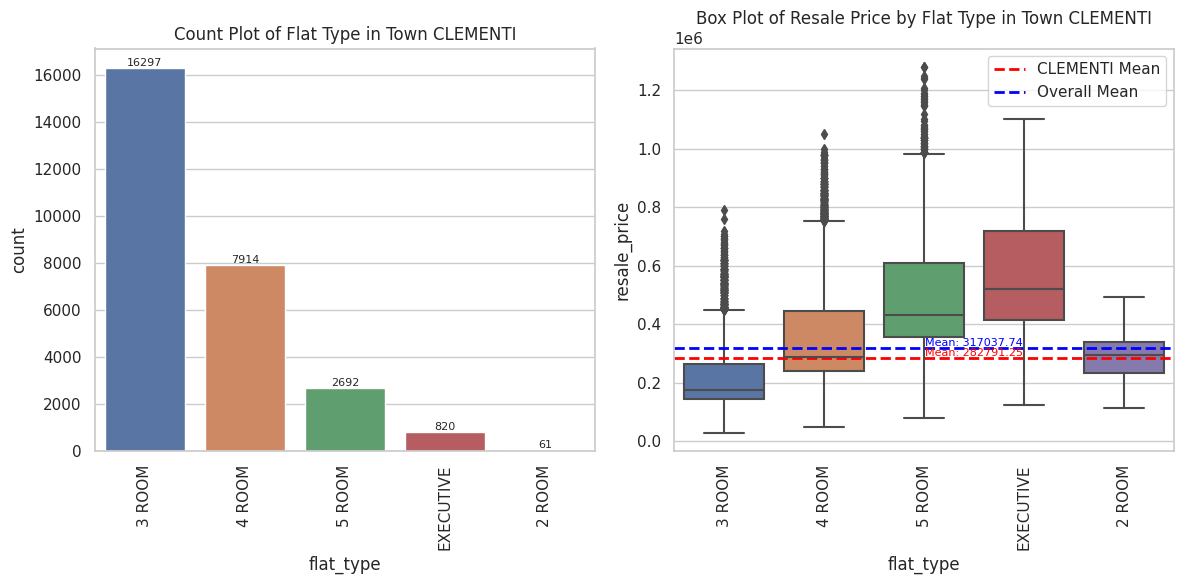

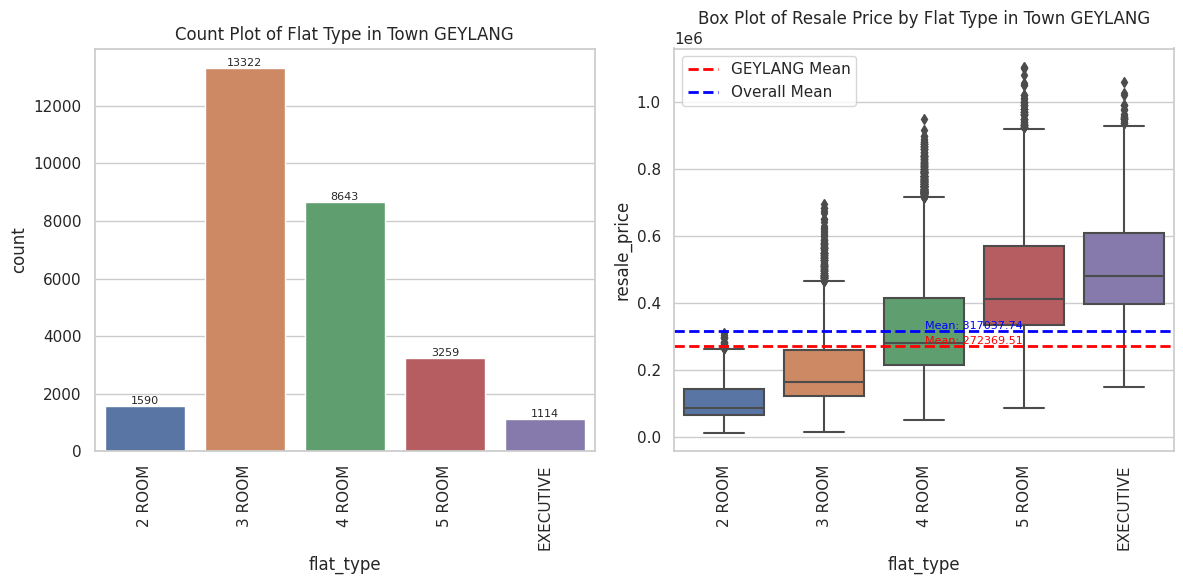

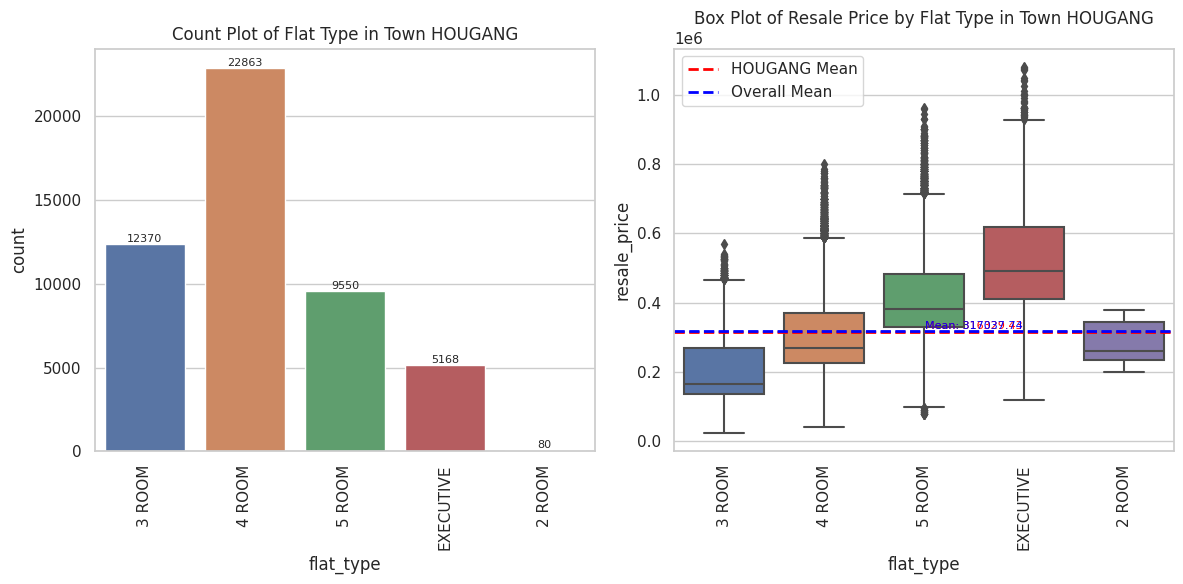

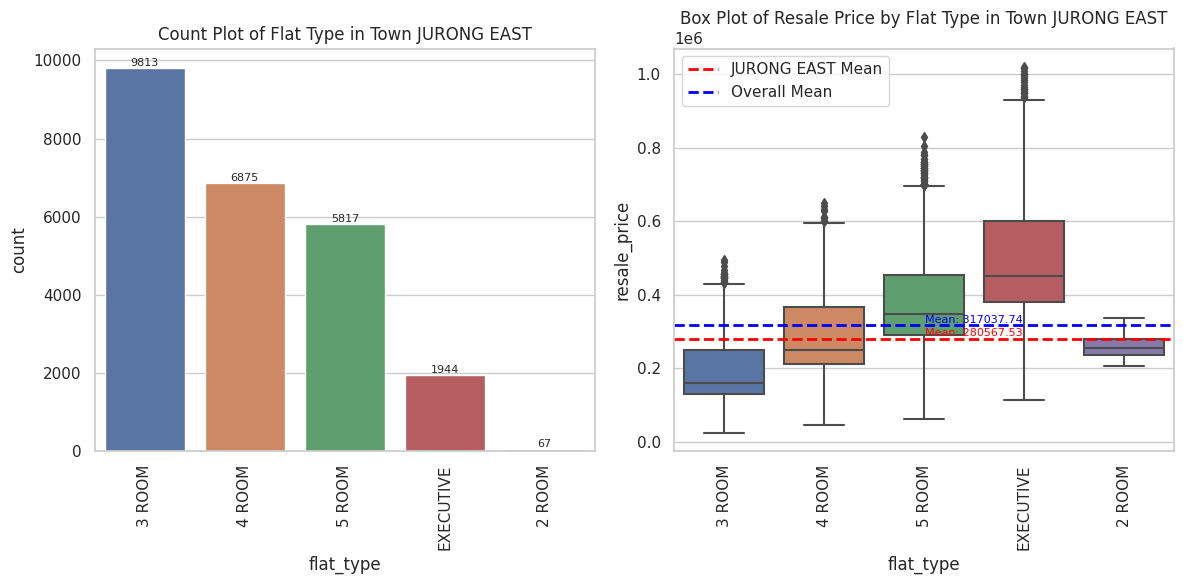

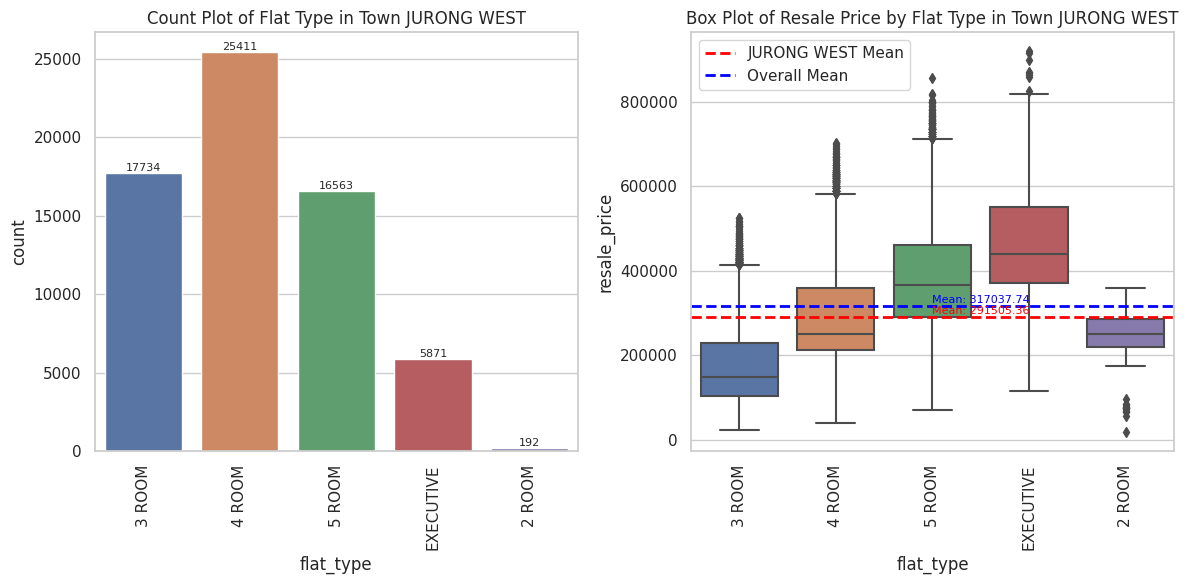

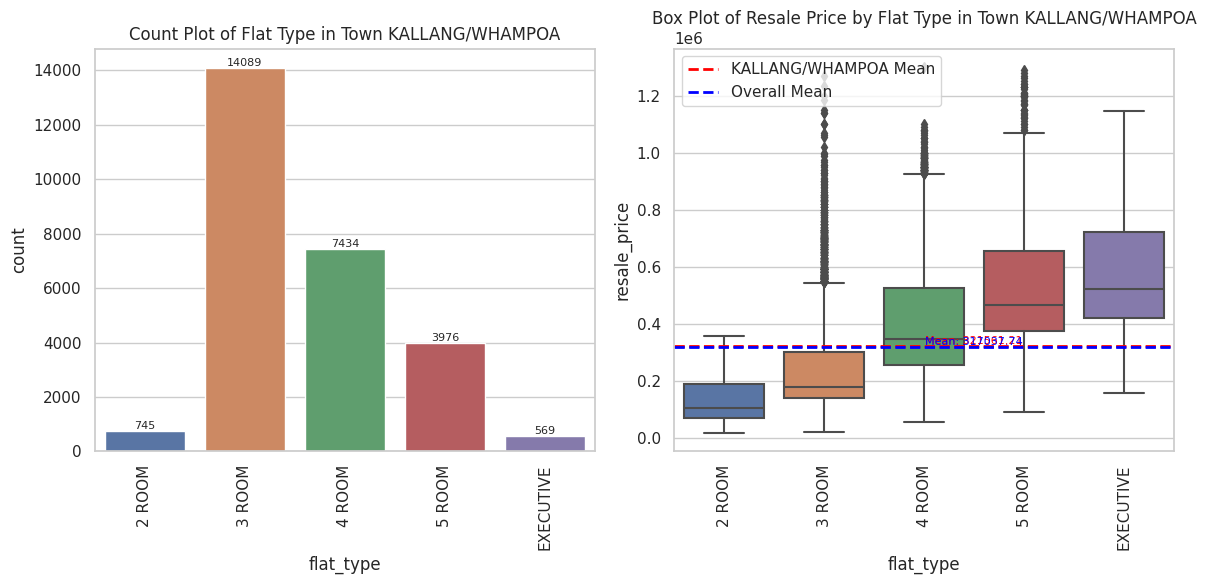

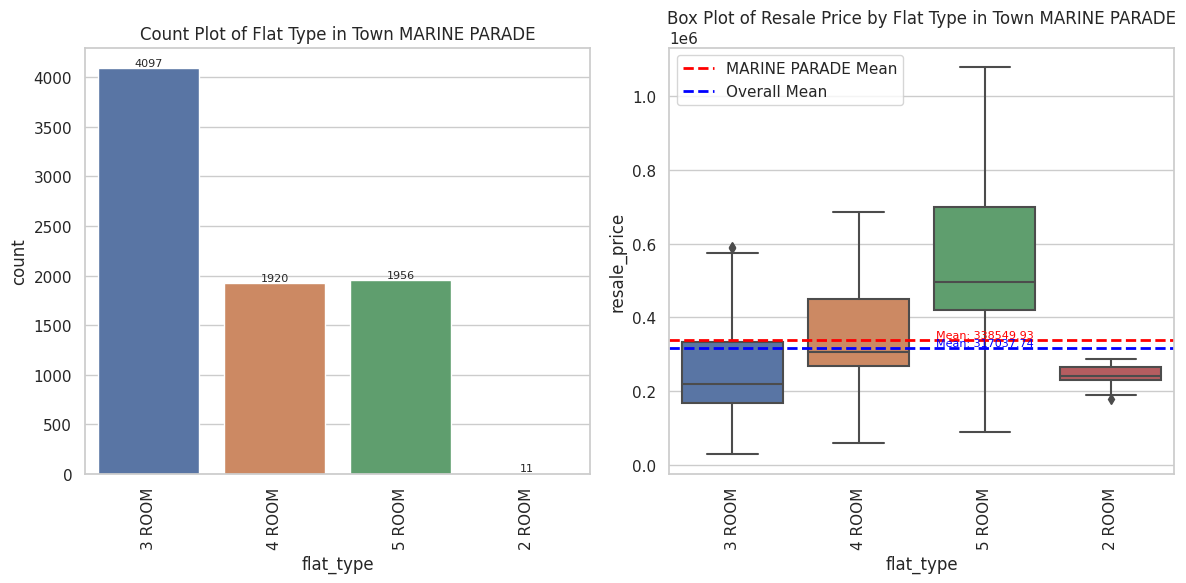

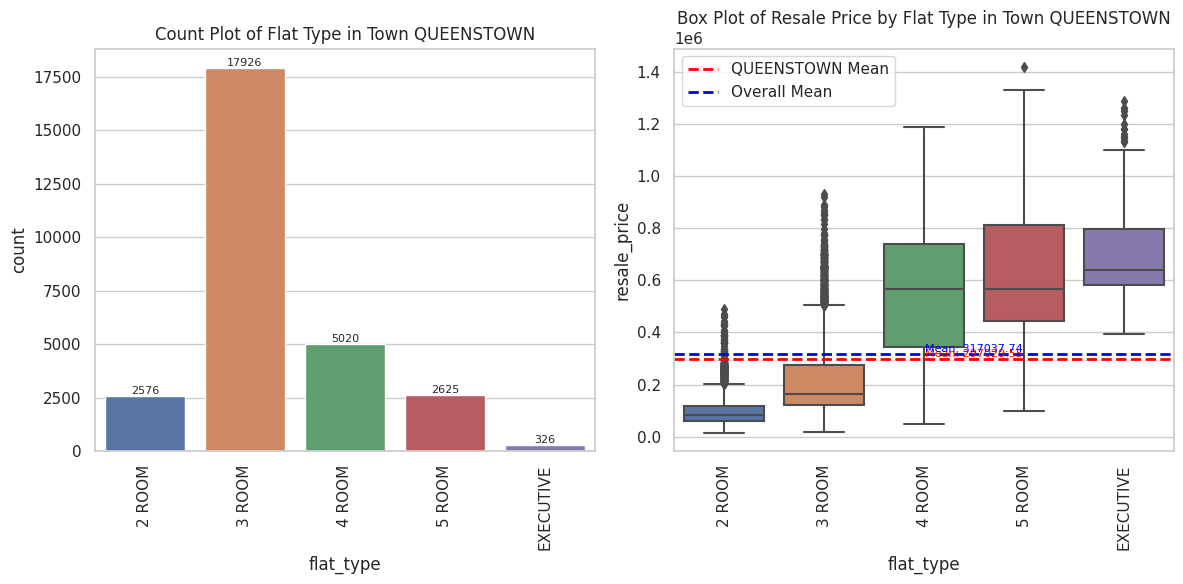

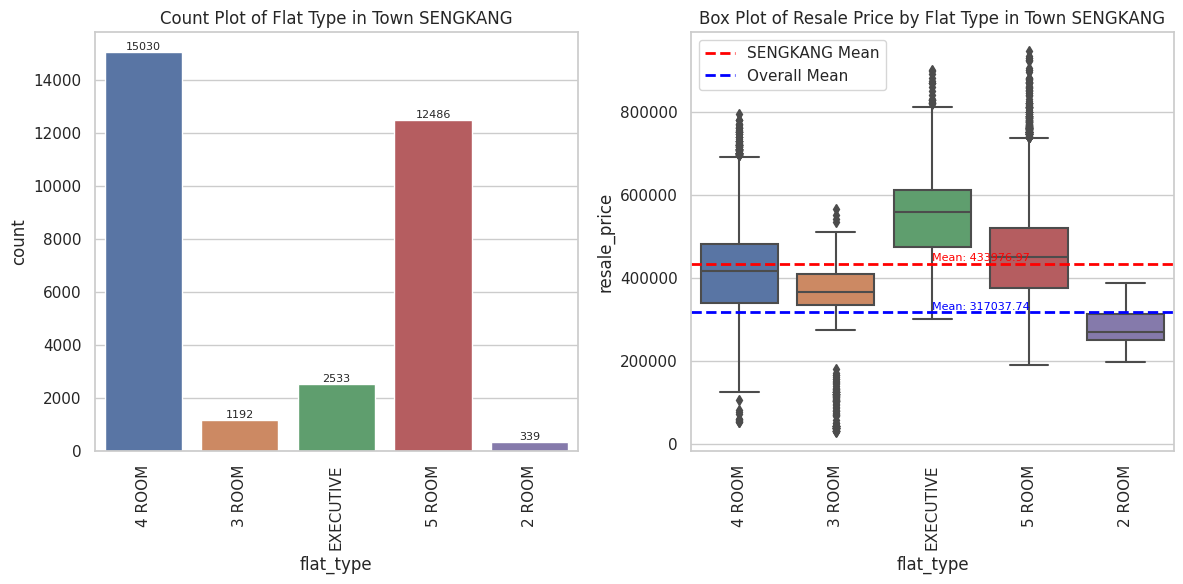

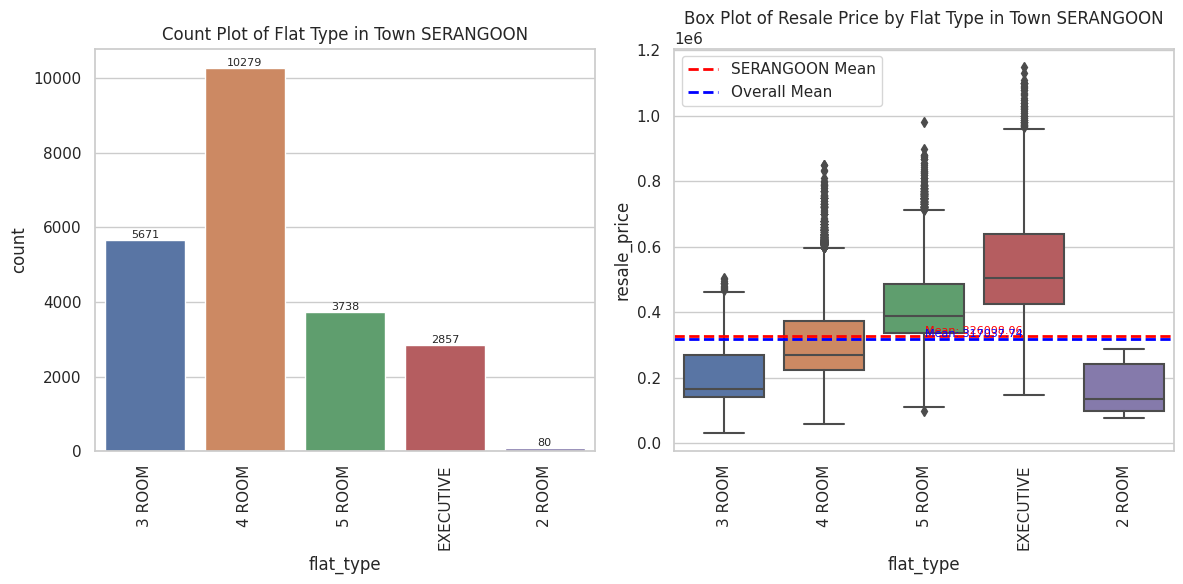

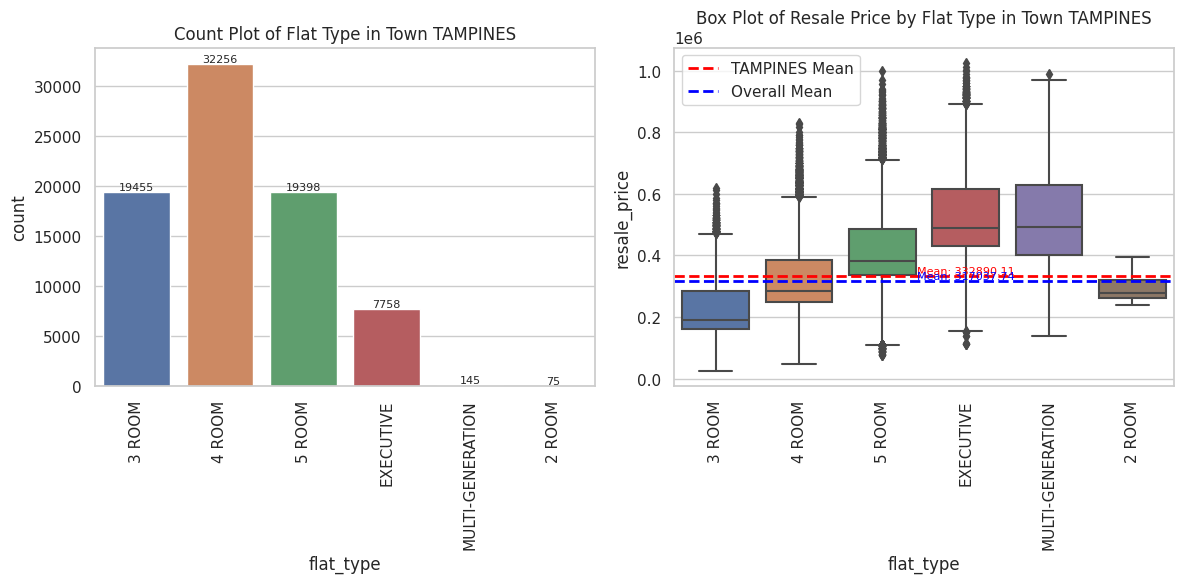

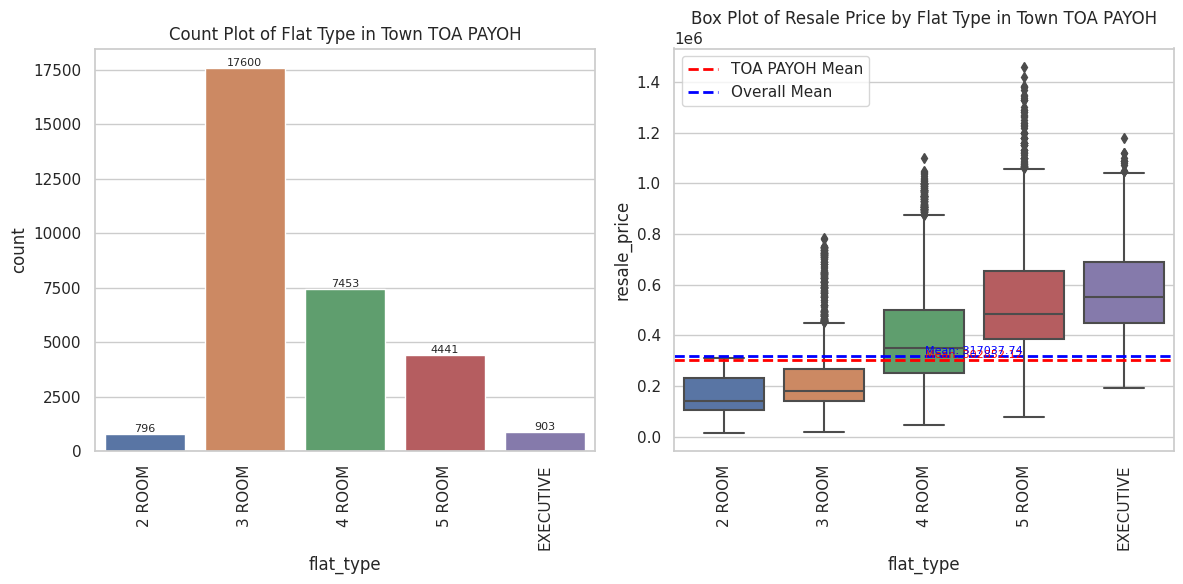

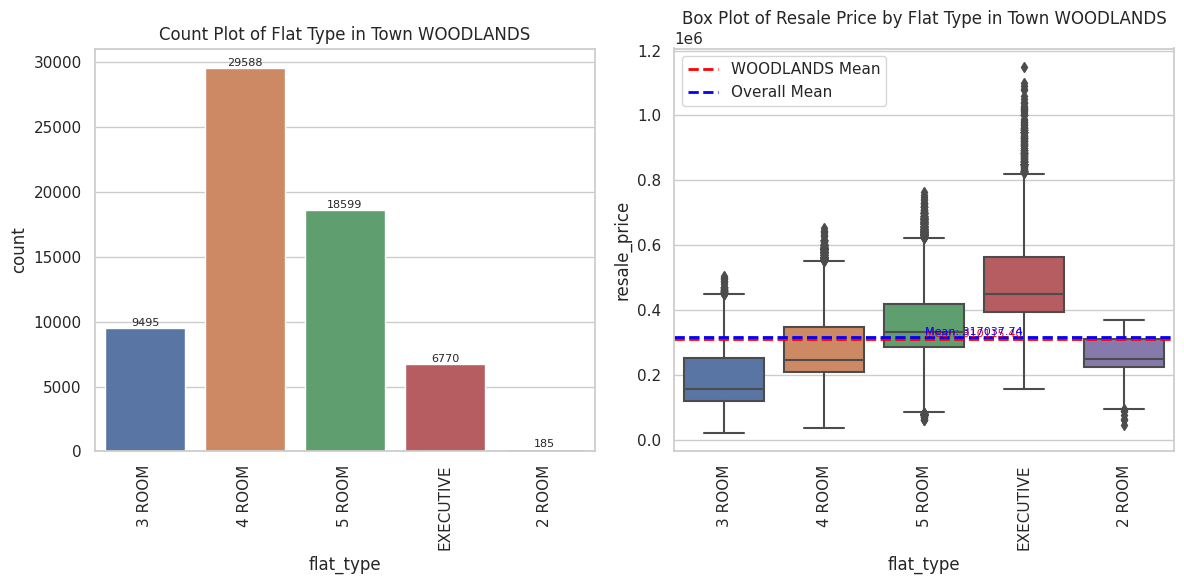

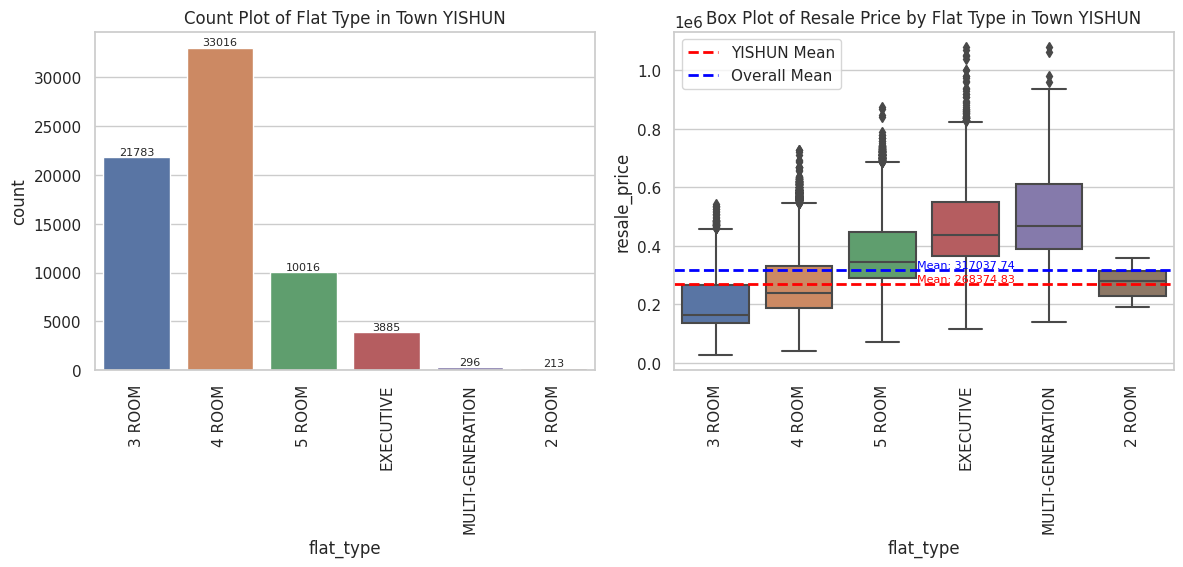

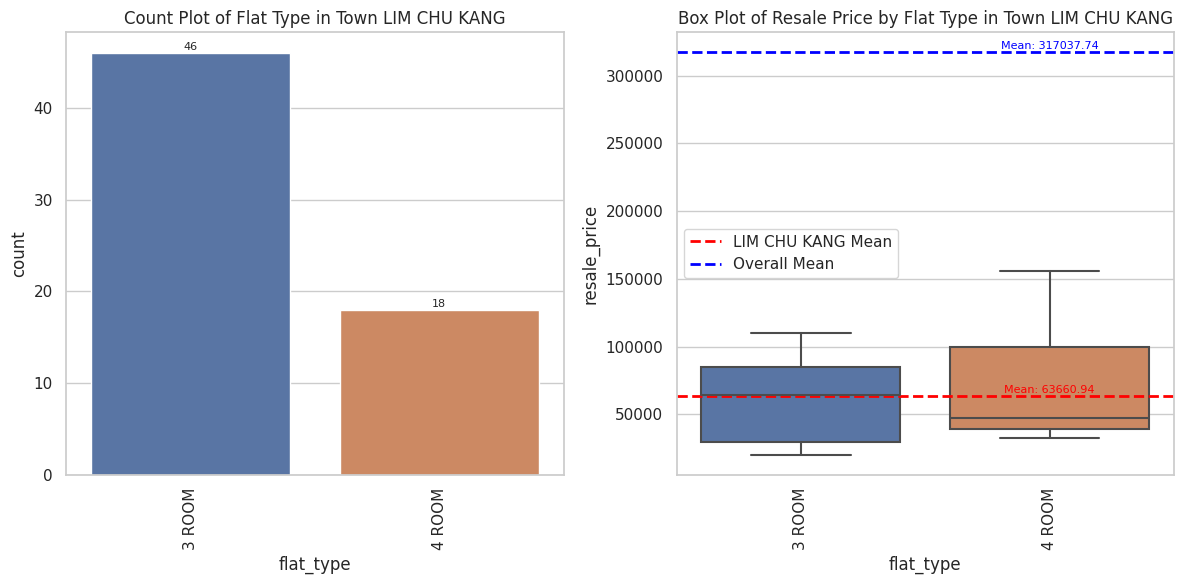

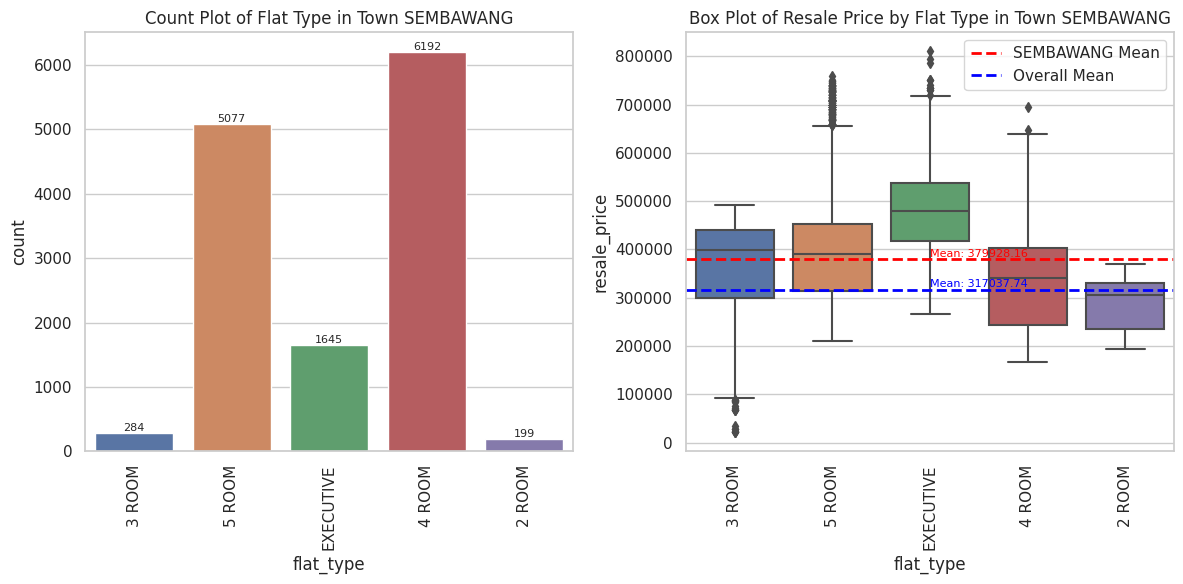

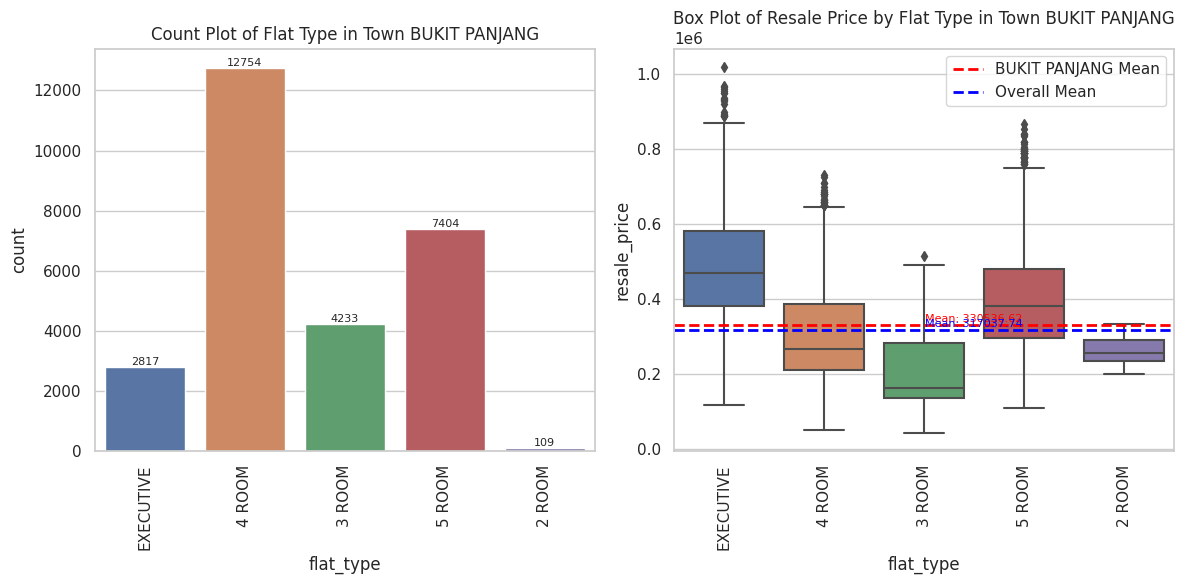

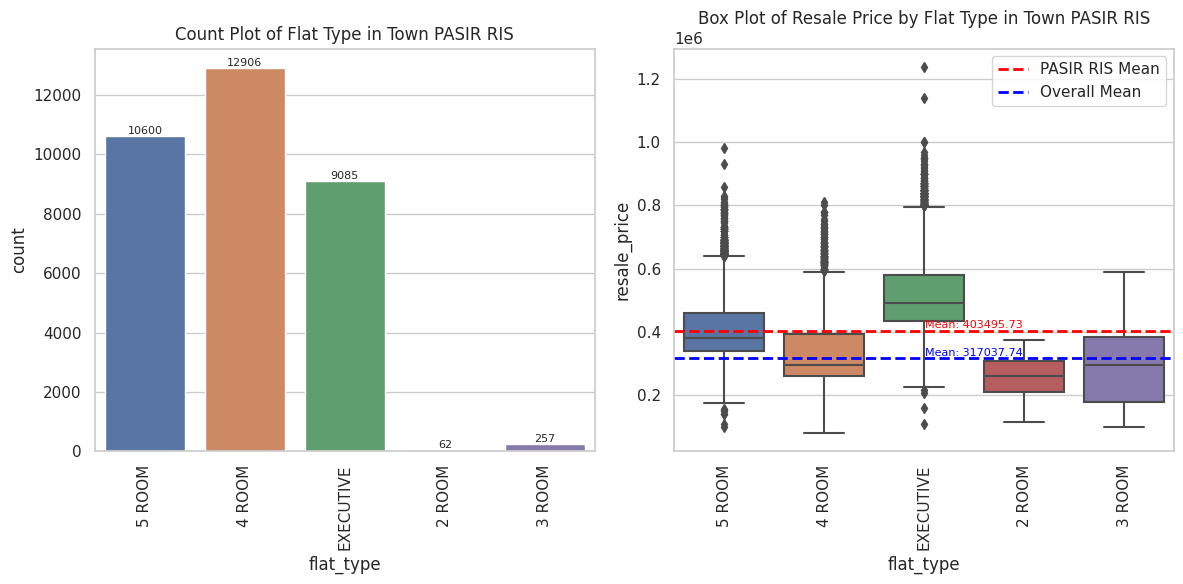

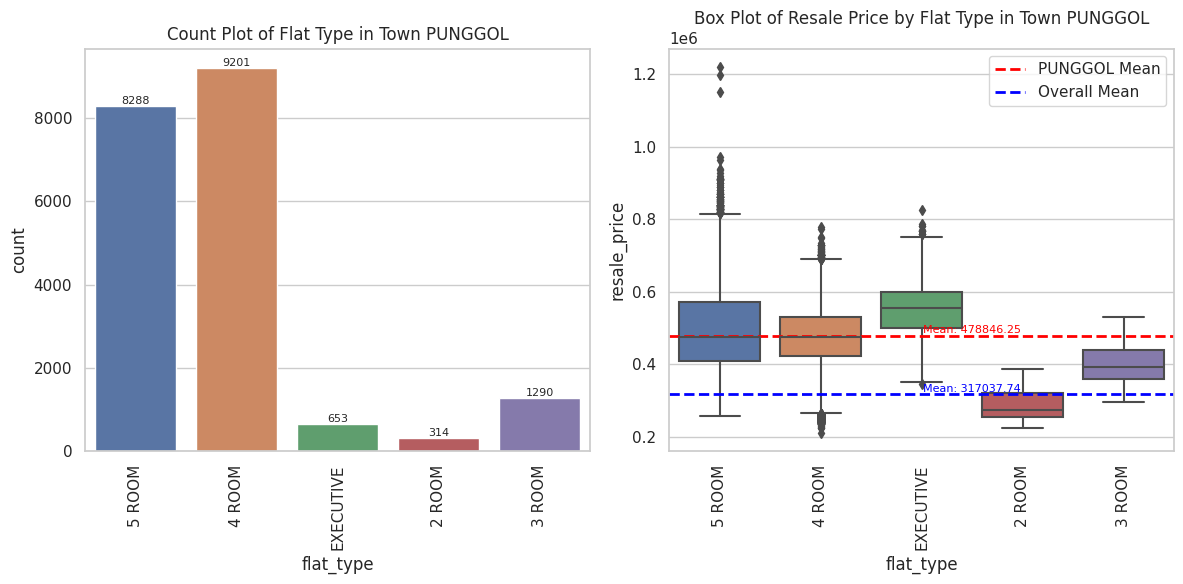

In [37]:

towns = data['town'].unique()

for town in towns:
    plt.figure(figsize=(12, 6))

    # Count plot for flat_type
    plt.subplot(1, 2, 1)
    count_plot = sns.countplot(x='flat_type', data=data[data['town'] == town])
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of Flat Type in Town {town}')

    # Add data labels for count of flat_type
    for p in count_plot.patches:
        count = int(p.get_height())
        plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

    # Box plot for resale_price by flat_type
    plt.subplot(1, 2, 2)
    box_plot = sns.boxplot(x='flat_type', y='resale_price', data=data[data['town'] == town])

    # Mean line for each town in red
    mean_resale_price = data[data['town'] == town]['resale_price'].mean()
    plt.axhline(mean_resale_price, color='red', linestyle='dashed', linewidth=2, label=f'{town} Mean')

    # Overall mean line in blue
    overall_mean_resale_price = data['resale_price'].mean()
    plt.axhline(overall_mean_resale_price, color='blue', linestyle='dashed', linewidth=2, label='Overall Mean')

    # Add data labels for mean values
    plt.text(len(box_plot.patches) / 2, mean_resale_price + 1000, f'Mean: {mean_resale_price:.2f}', ha='center', va='bottom', fontsize=8, color='red')

    # Add data labels for mean values
    plt.text(len(box_plot.patches) / 2, overall_mean_resale_price + 1000, f'Mean: {overall_mean_resale_price:.2f}', ha='center', va='bottom', fontsize=8, color='blue')


    plt.xticks(rotation=90)
    plt.title(f'Box Plot of Resale Price by Flat Type in Town {town}')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Count and Distribution of flat model by town**

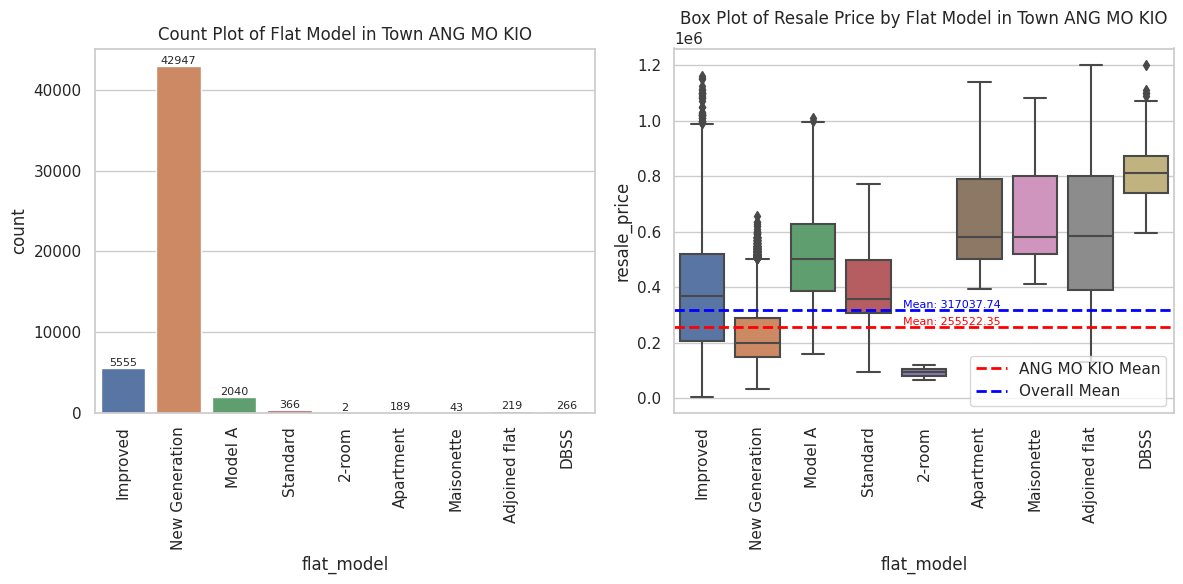

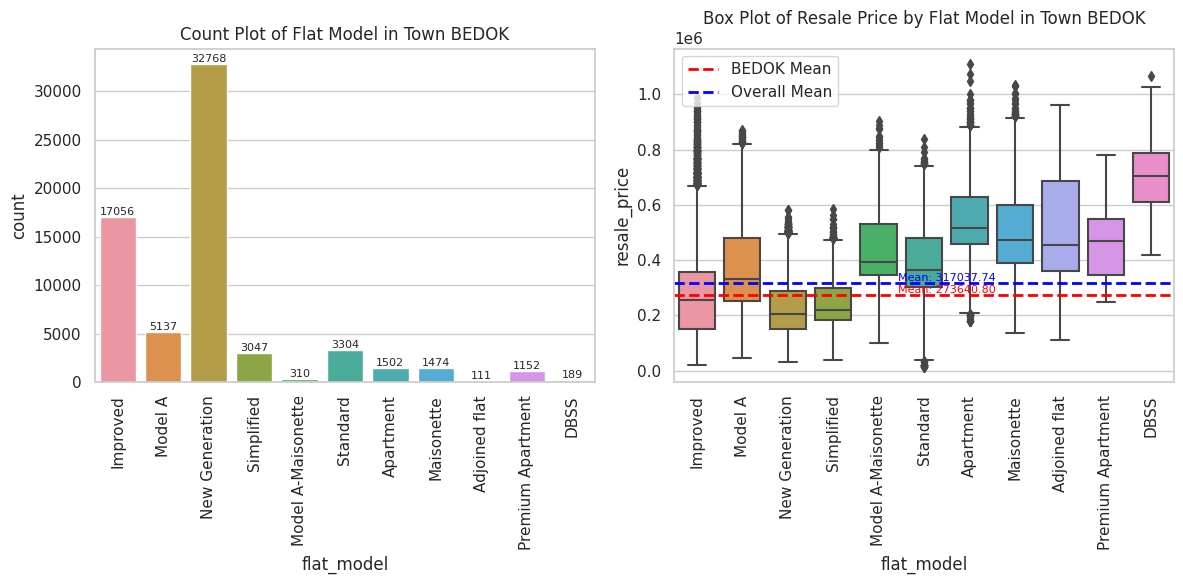

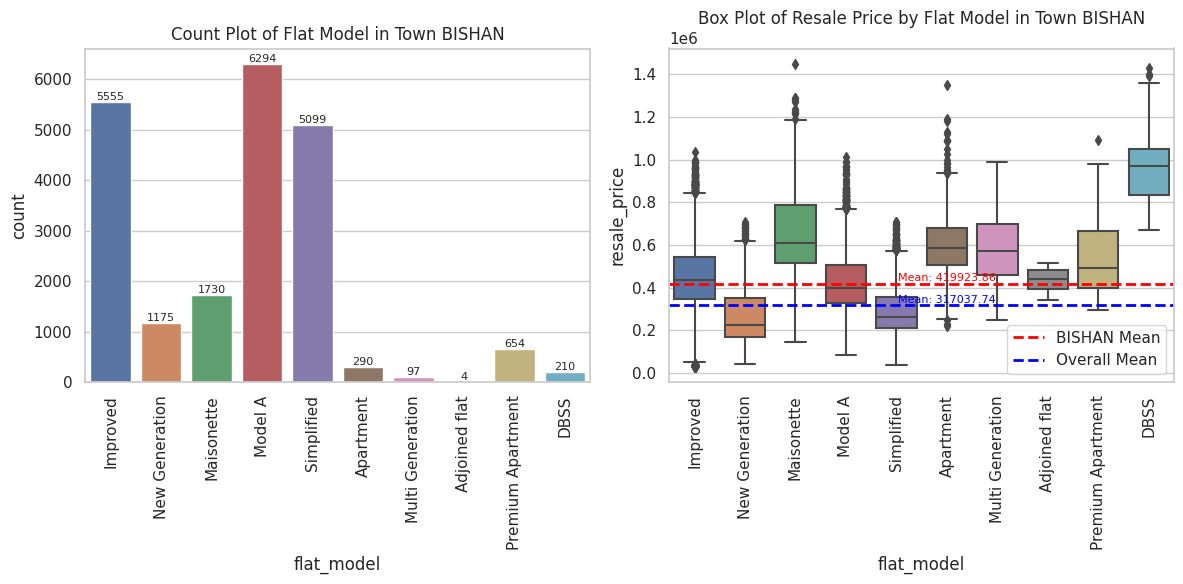

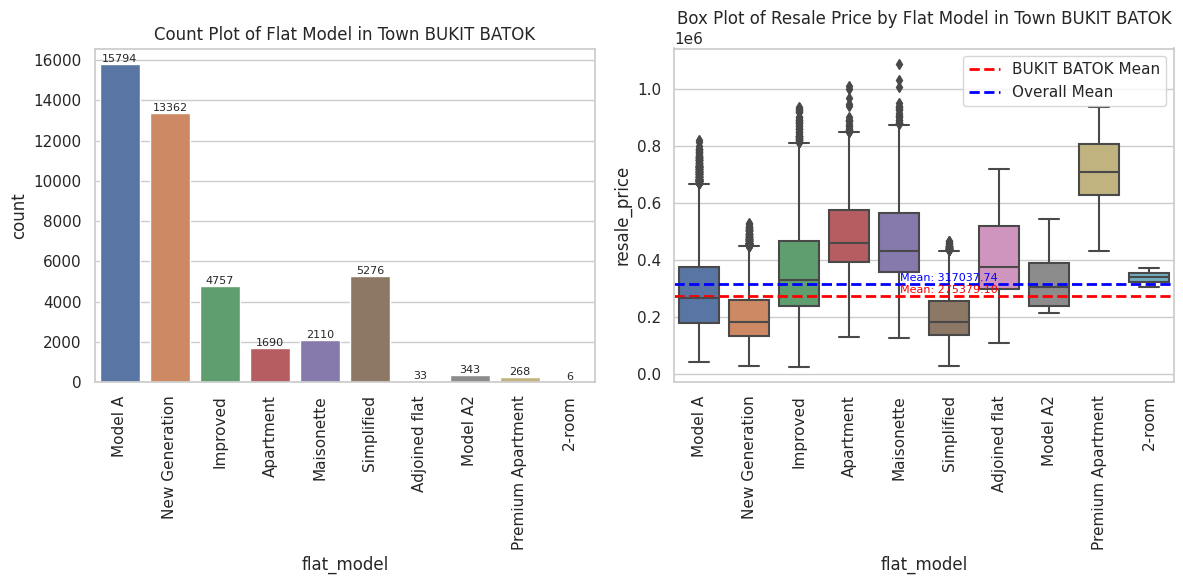

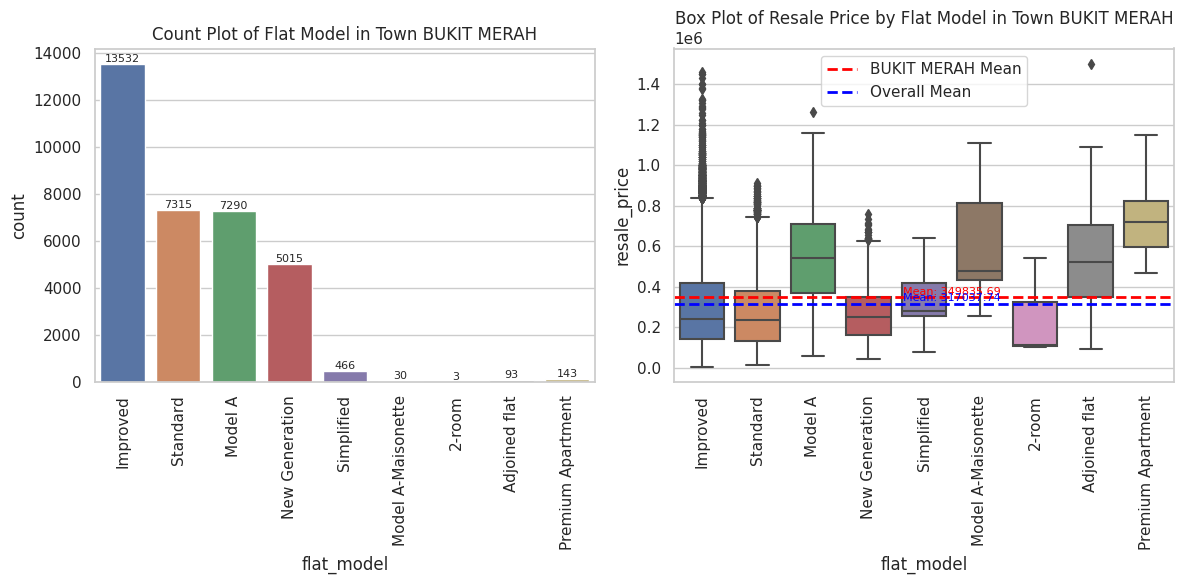

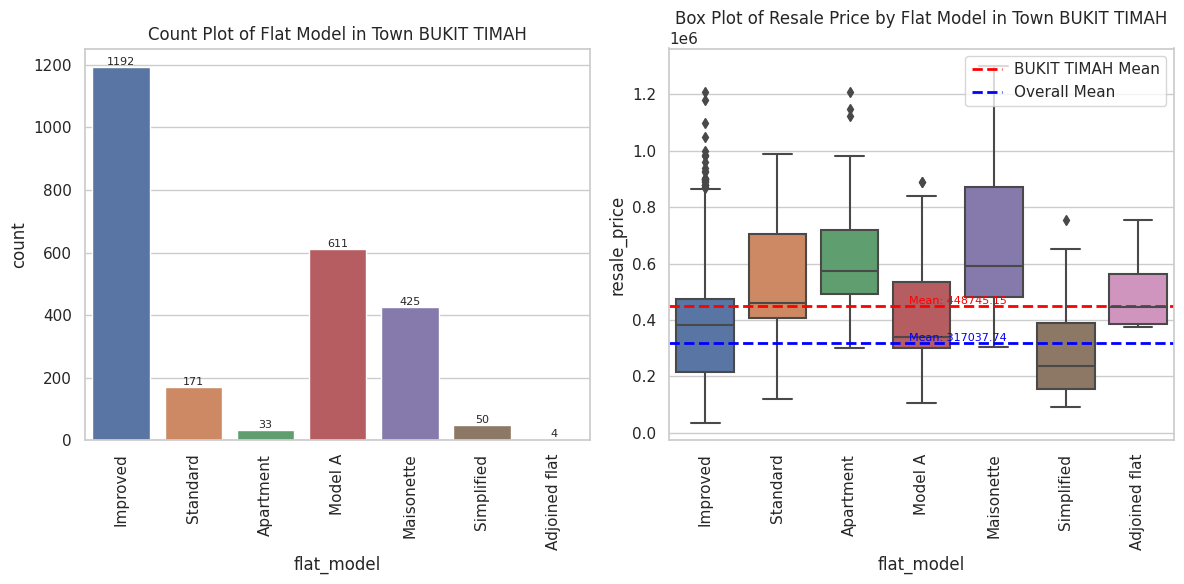

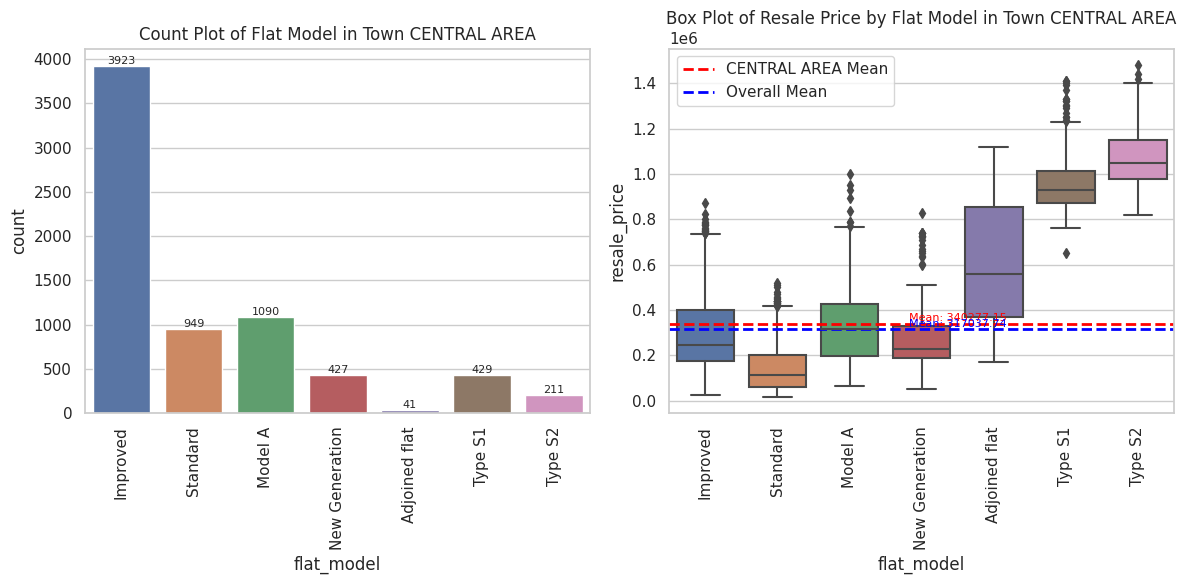

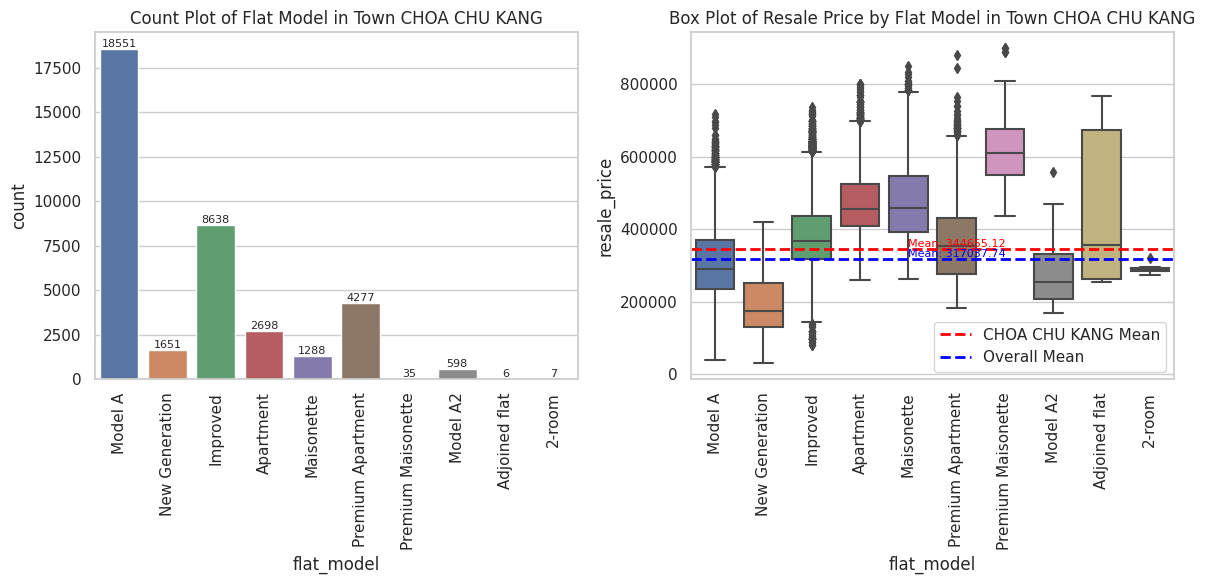

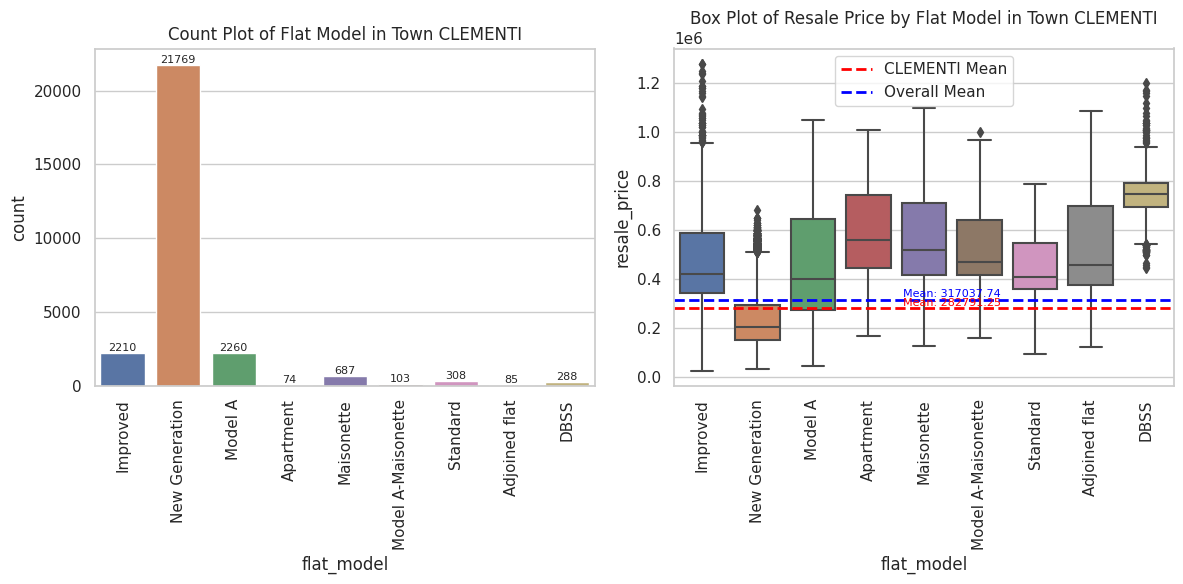

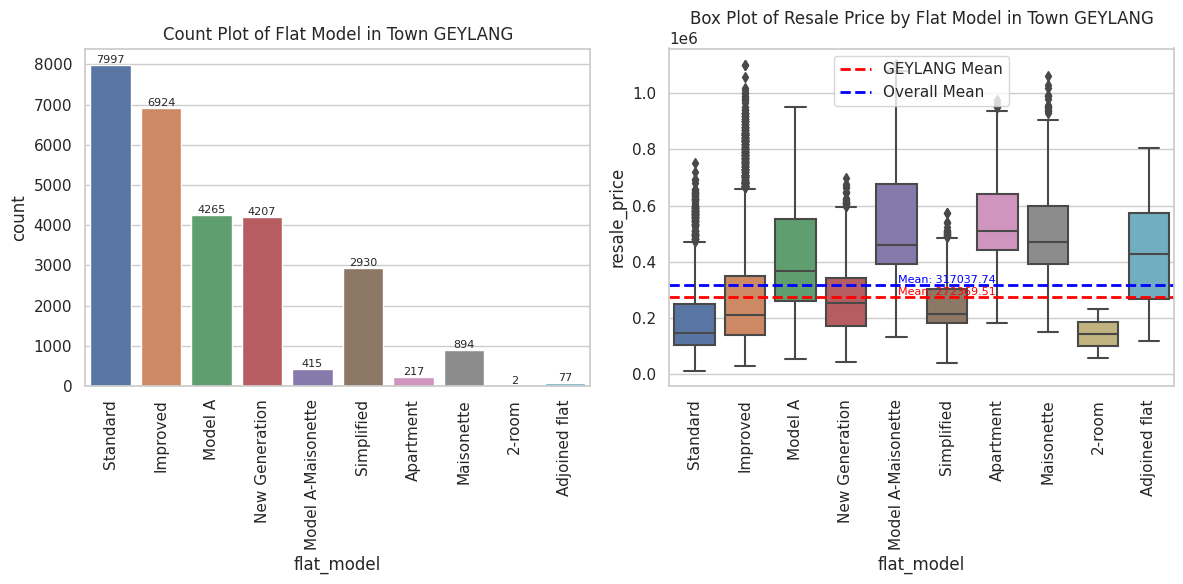

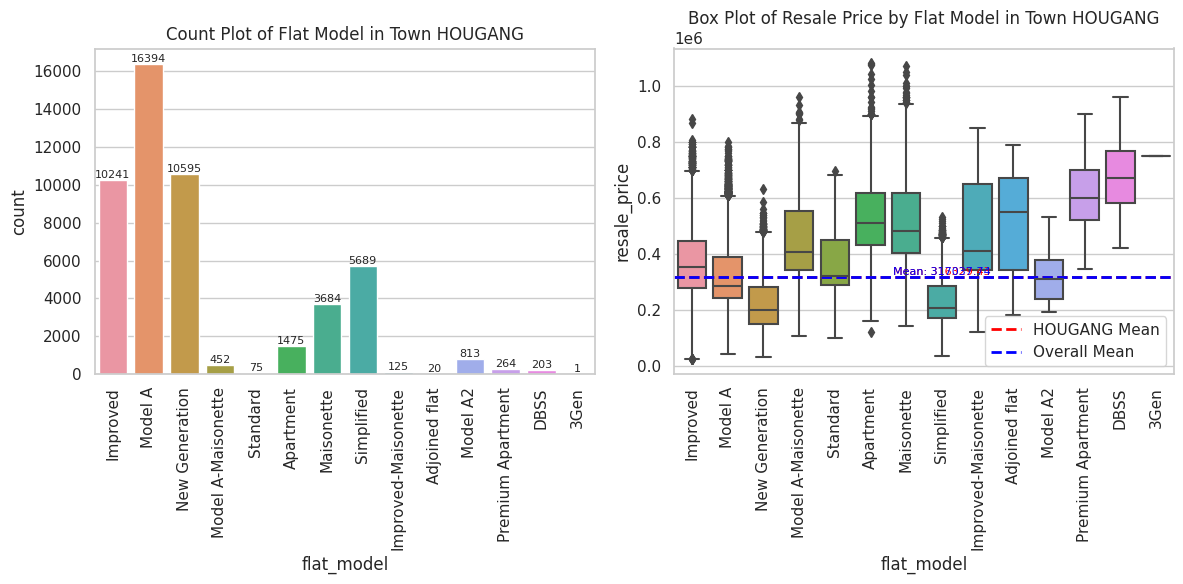

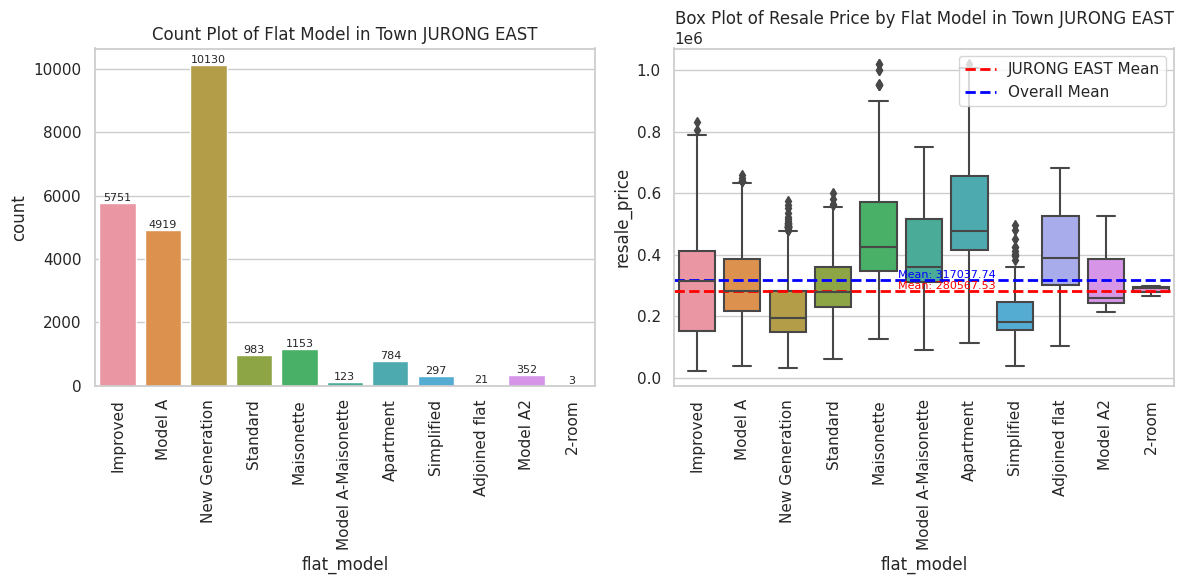

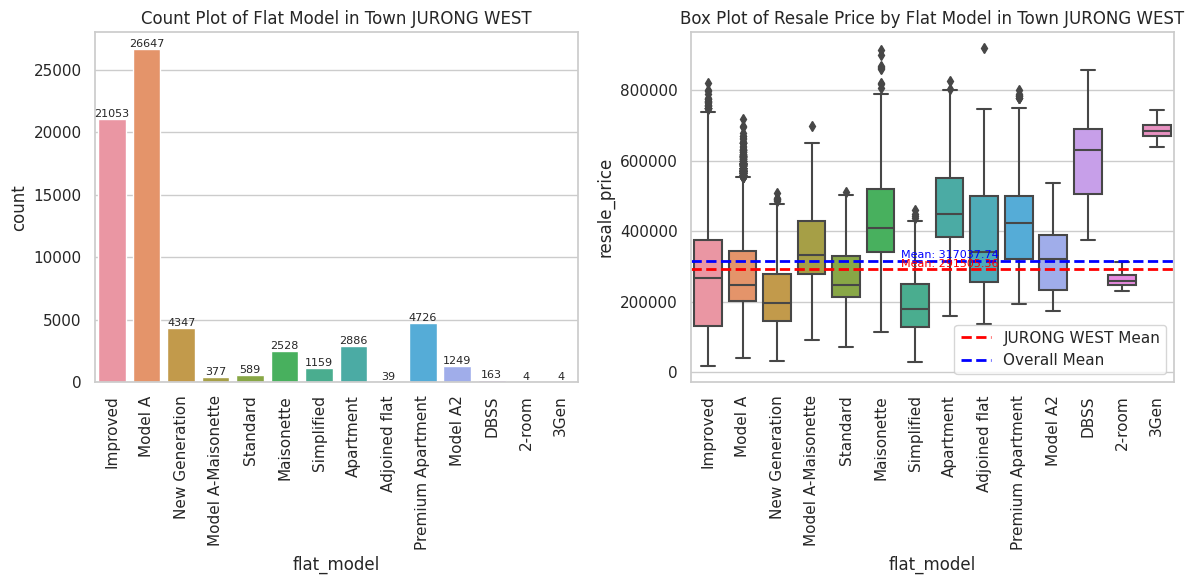

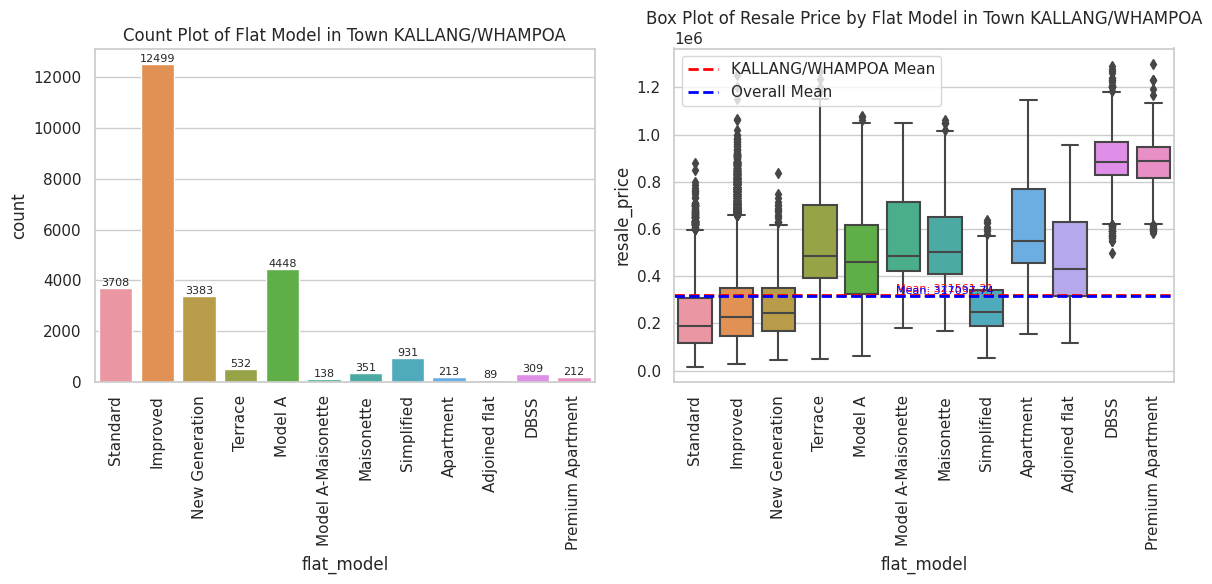

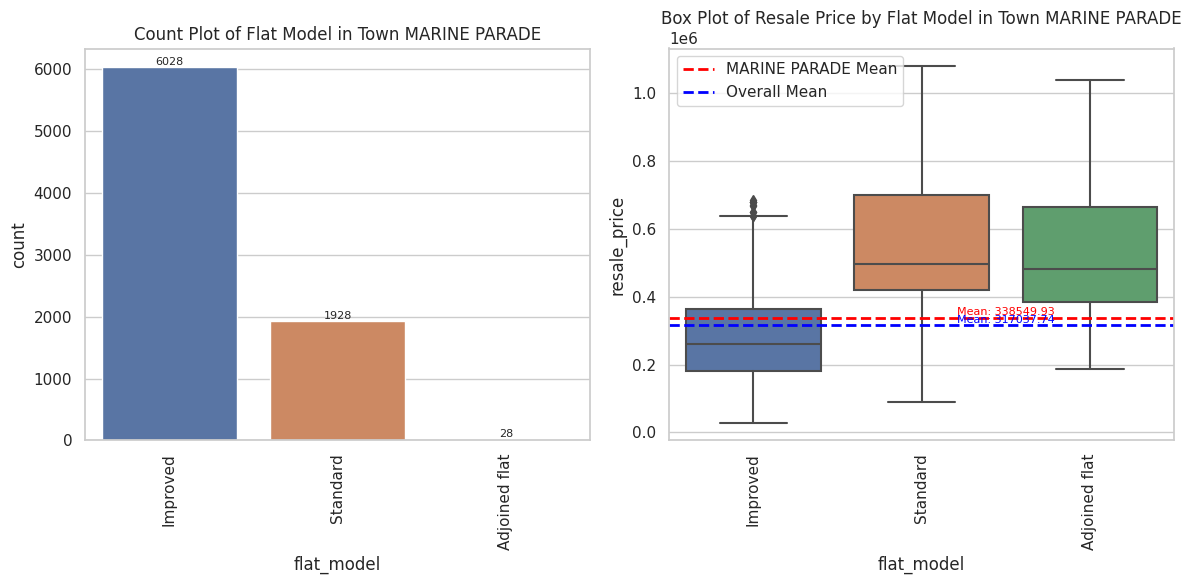

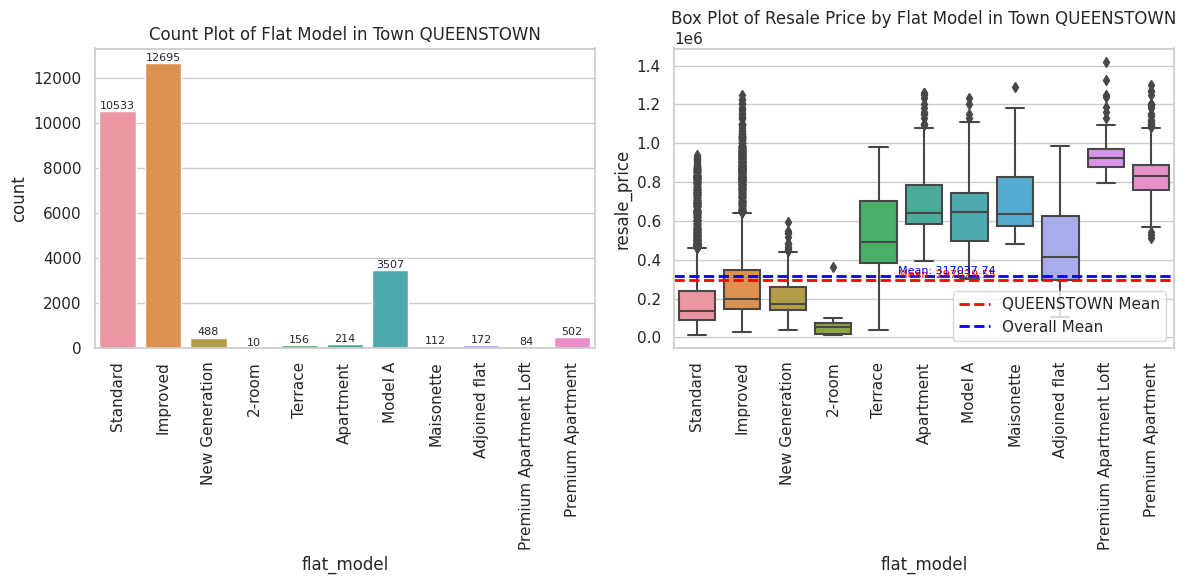

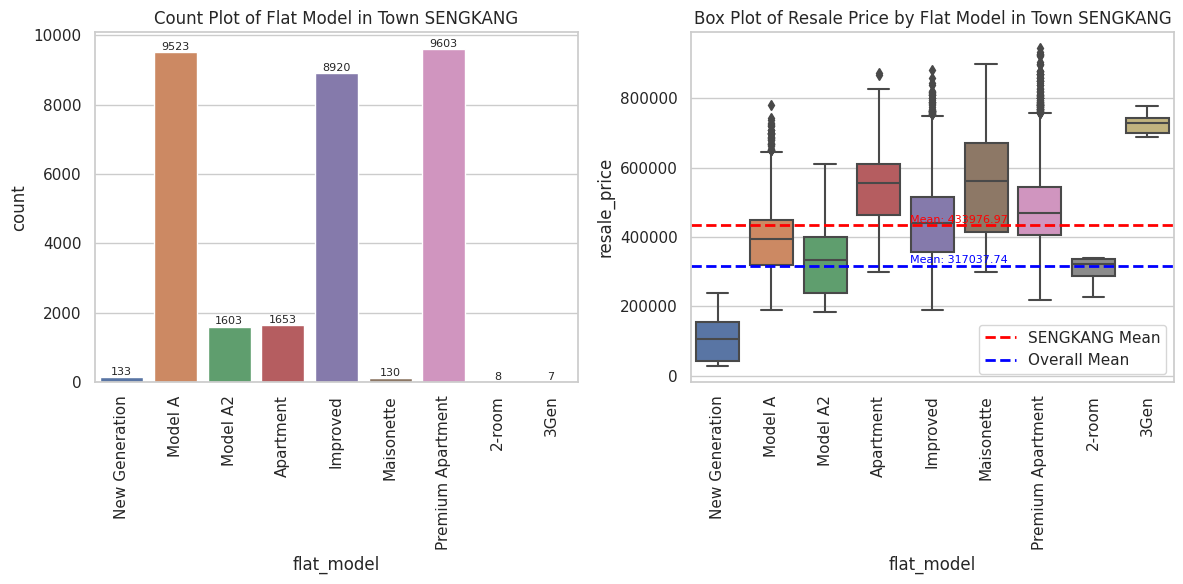

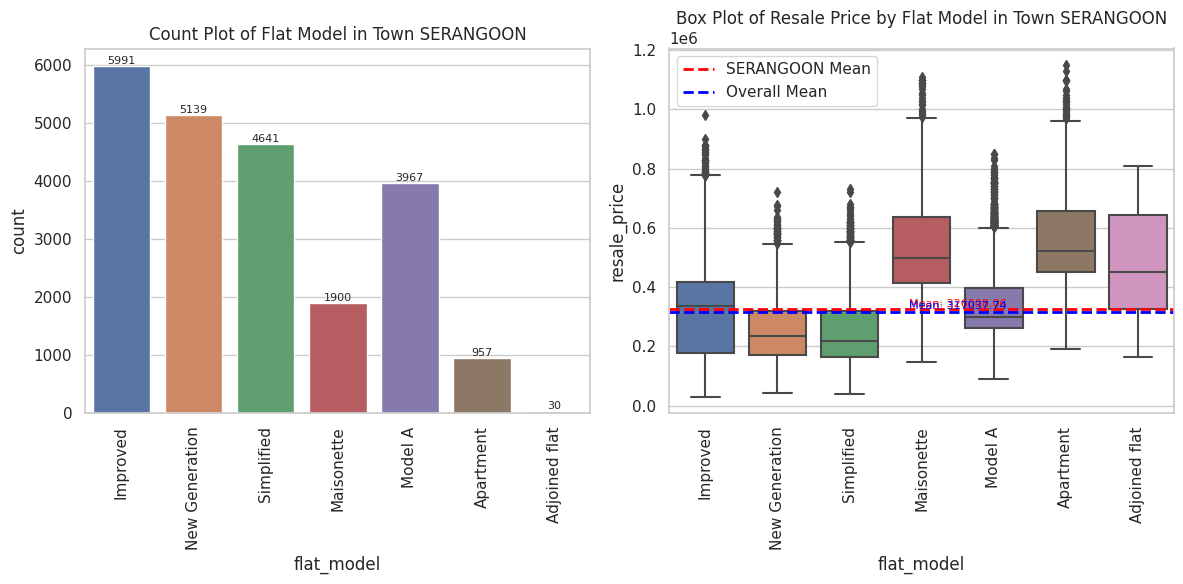

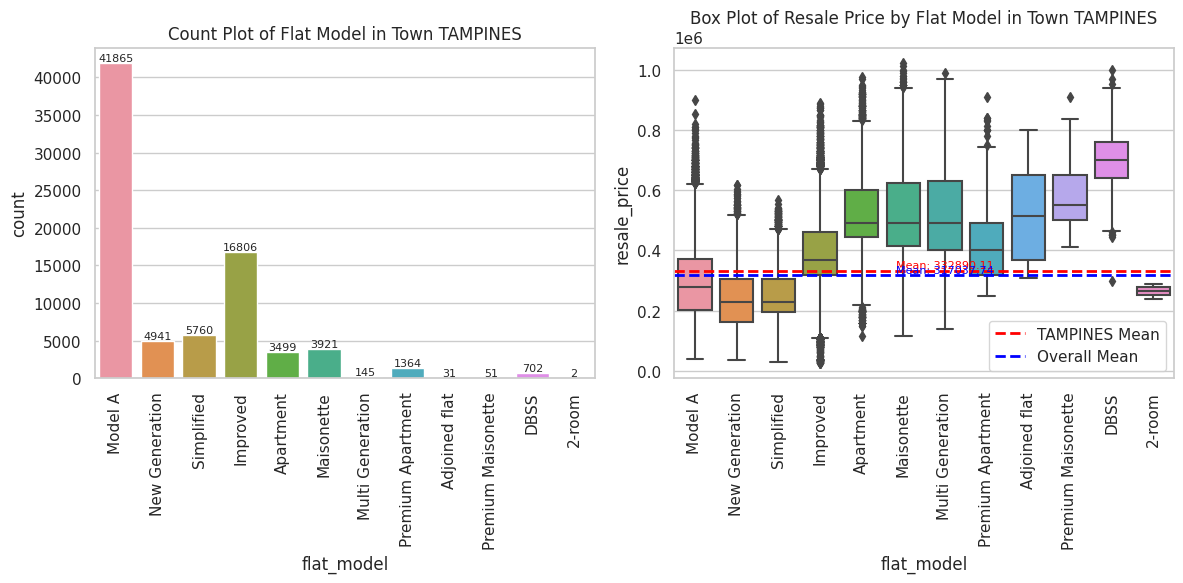

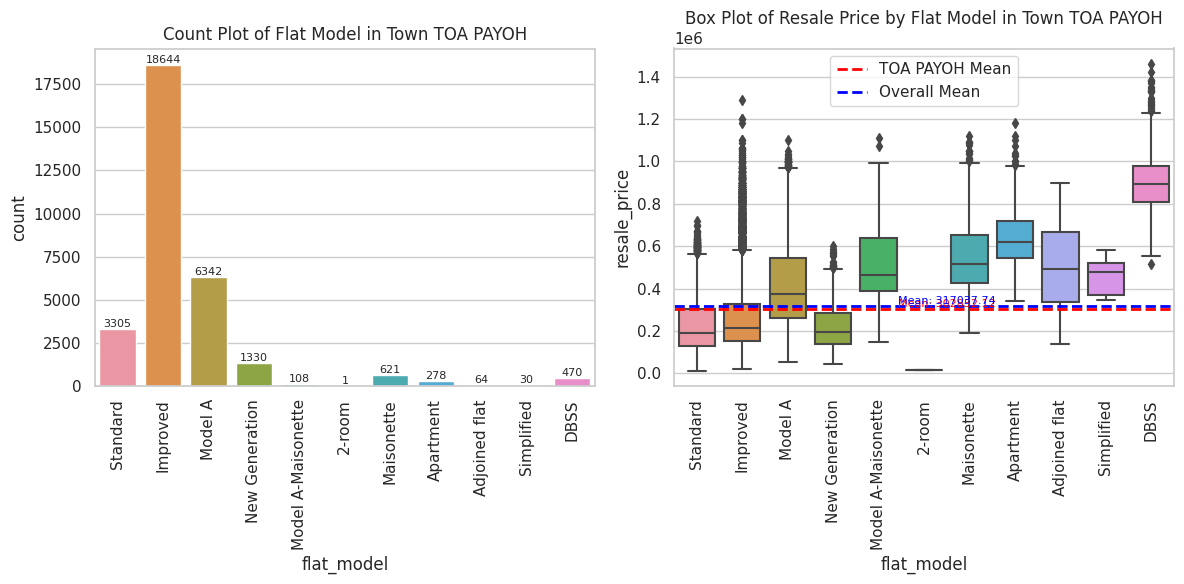

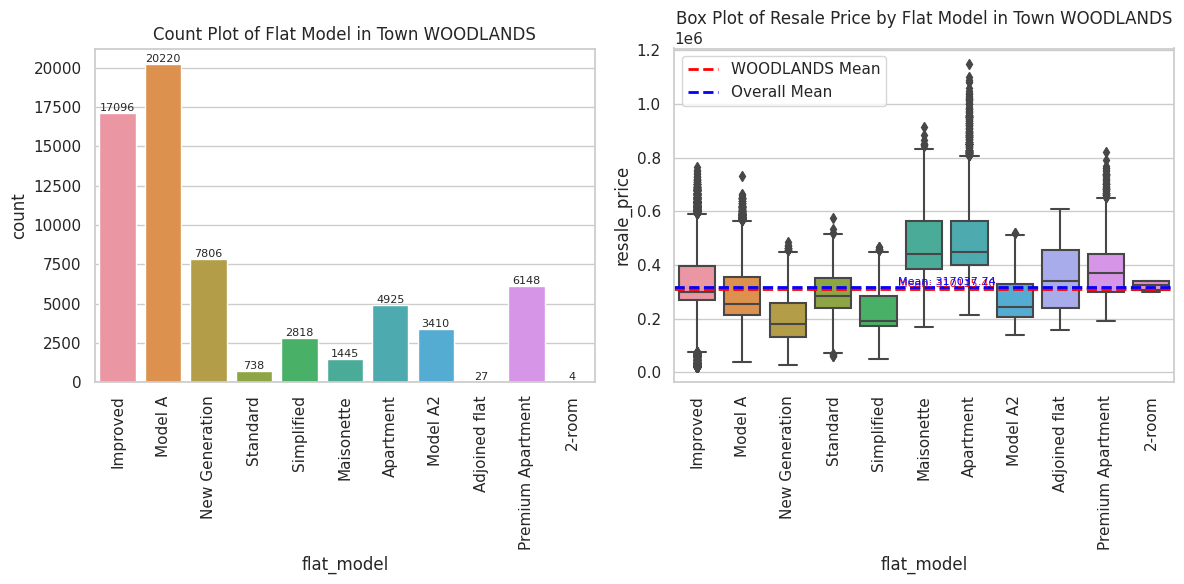

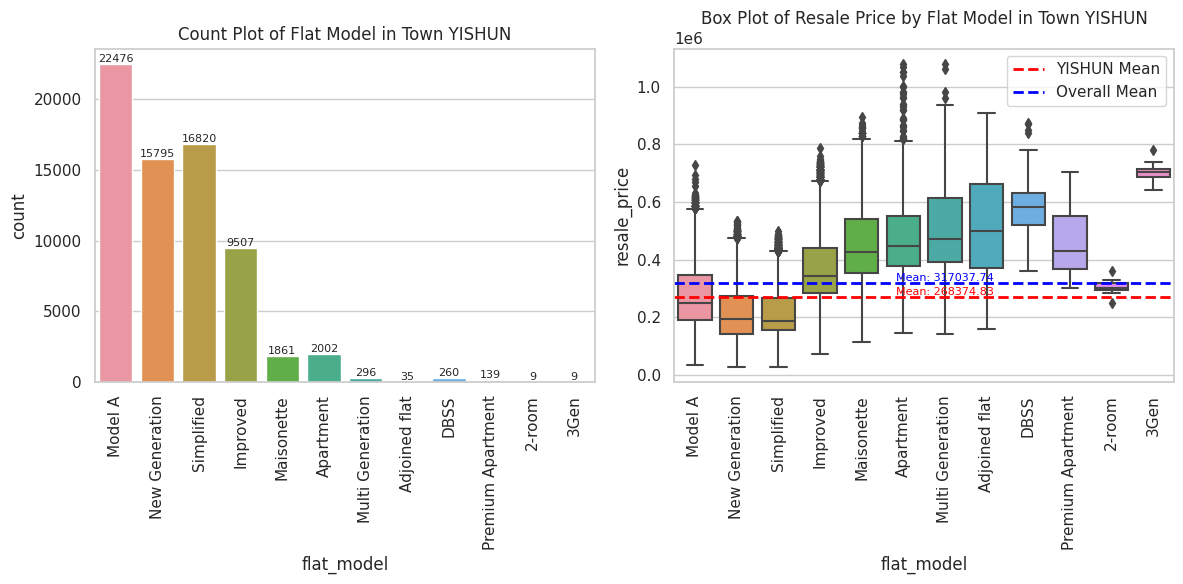

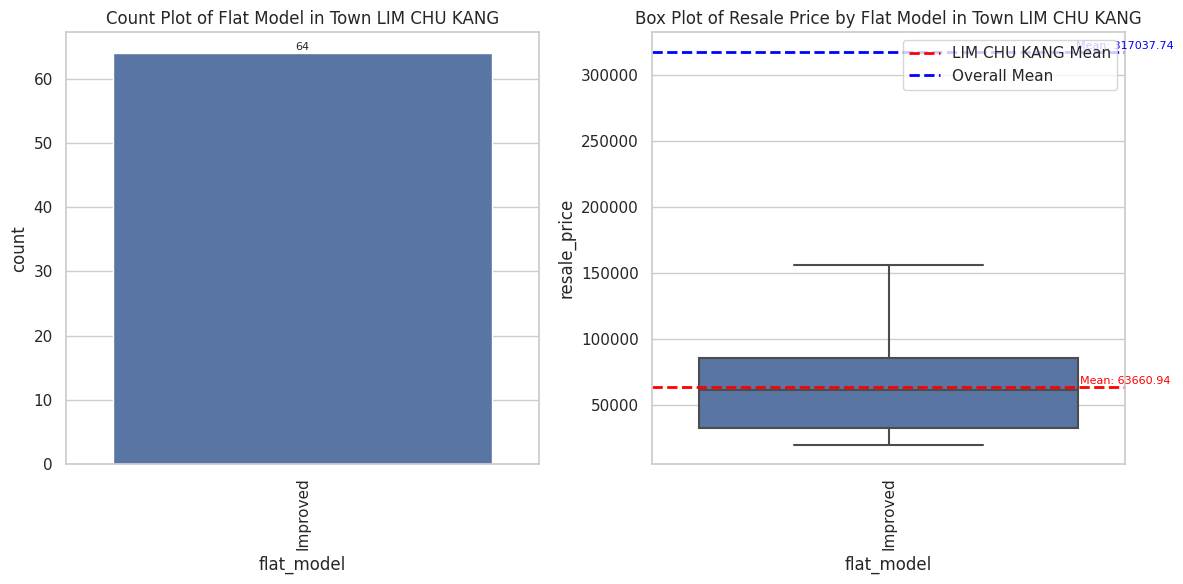

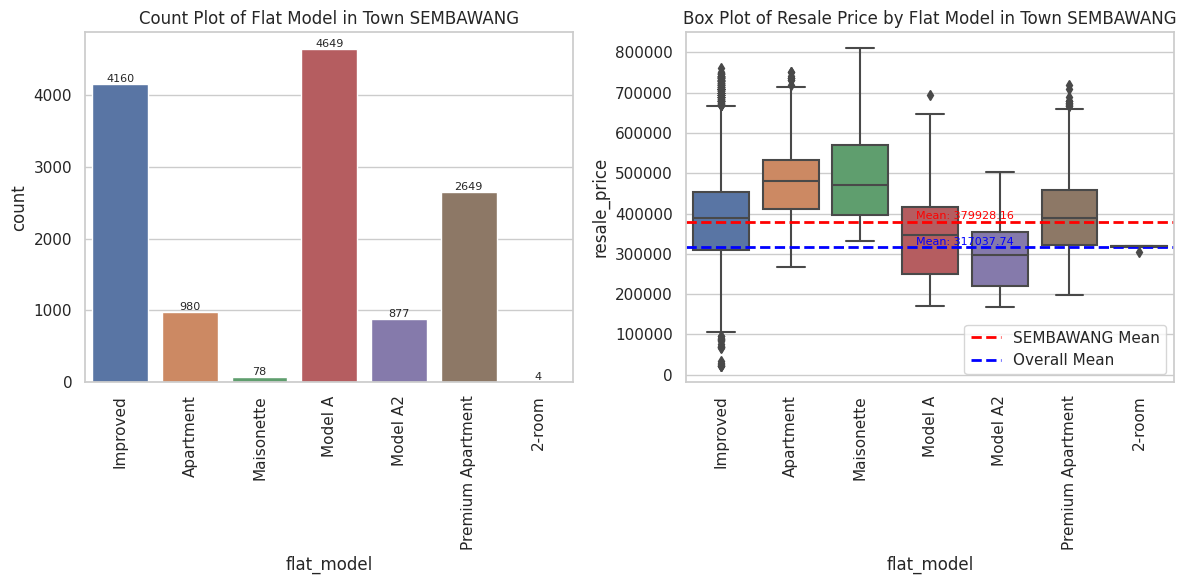

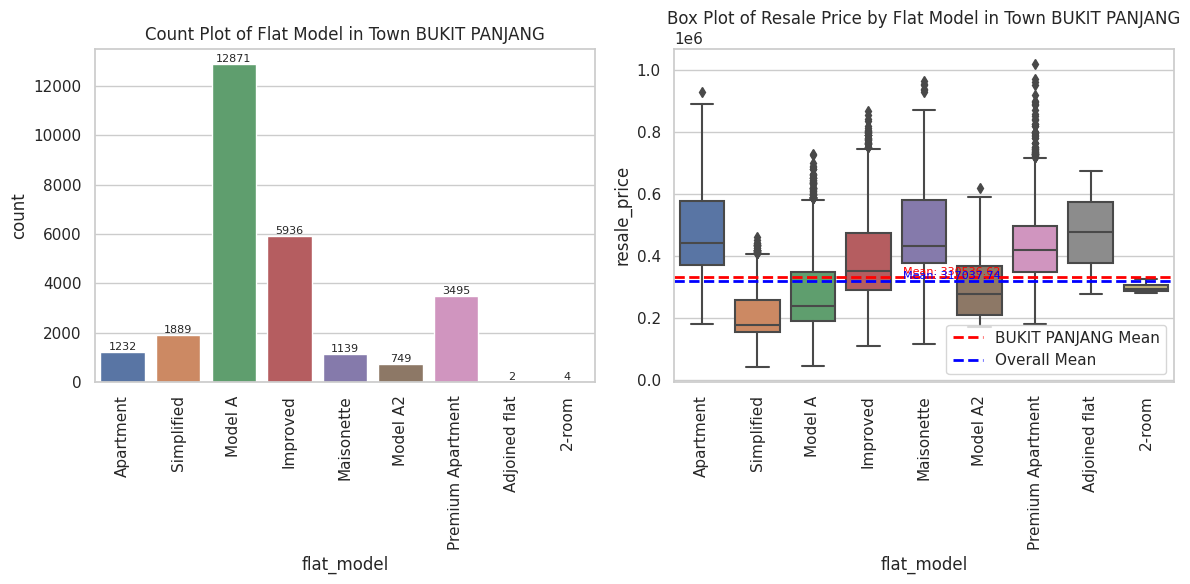

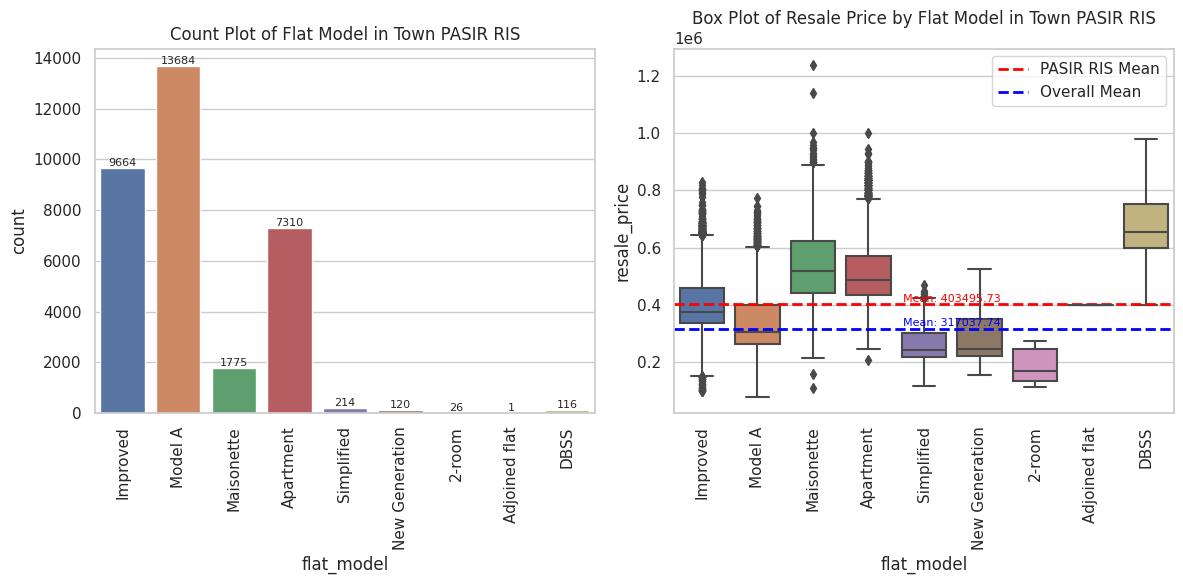

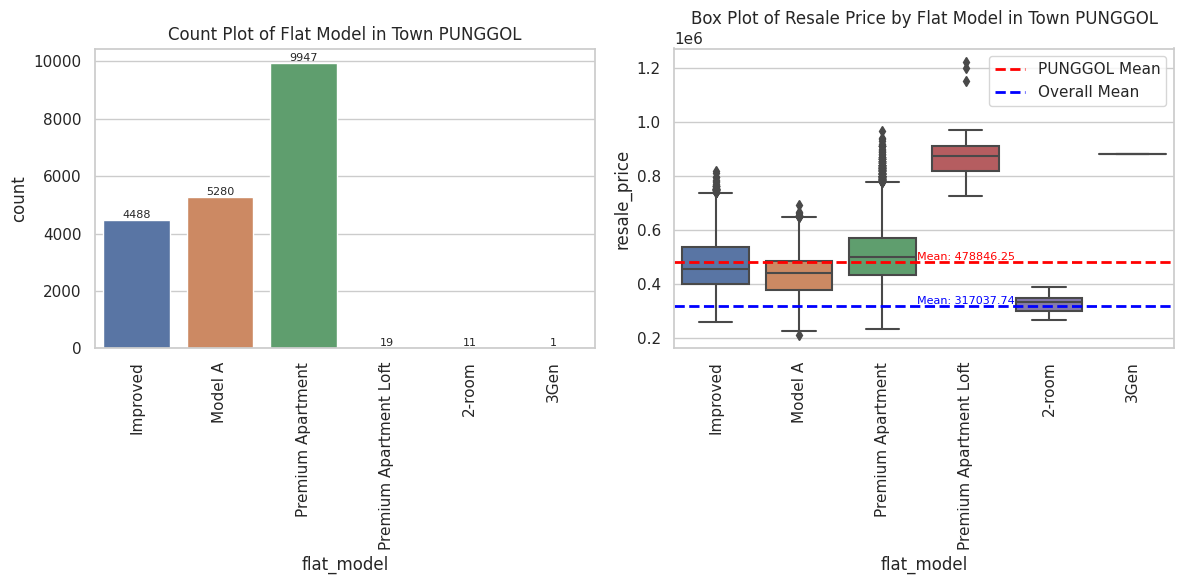

In [16]:
towns = data['town'].unique()

for town in towns:
    plt.figure(figsize=(12, 6))

    # Count plot for flat_model
    plt.subplot(1, 2, 1)
    count_plot = sns.countplot(x='flat_model', data=data[data['town'] == town])
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of Flat Model in Town {town}')

    # Add data labels for count of flat_model
    for p in count_plot.patches:
        count = int(p.get_height())
        plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

    # Box plot for resale_price by flat_model
    plt.subplot(1, 2, 2)
    box_plot = sns.boxplot(x='flat_model', y='resale_price', data=data[data['town'] == town])

    # Mean line for each town in red
    mean_resale_price = data[data['town'] == town]['resale_price'].mean()
    plt.axhline(mean_resale_price, color='red', linestyle='dashed', linewidth=2, label=f'{town} Mean')

    # Overall mean line in blue
    overall_mean_resale_price = data['resale_price'].mean()
    plt.axhline(overall_mean_resale_price, color='blue', linestyle='dashed', linewidth=2, label='Overall Mean')

    # Add data labels for mean values
    plt.text(len(box_plot.patches) / 2, mean_resale_price + 1000, f'Mean: {mean_resale_price:.2f}', ha='center', va='bottom', fontsize=8, color='red')

    # Add data labels for mean values
    plt.text(len(box_plot.patches) / 2, overall_mean_resale_price + 1000, f'Mean: {overall_mean_resale_price:.2f}', ha='center', va='bottom', fontsize=8, color='blue')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of Resale Price by Flat Model in Town {town}')
    plt.legend()

    plt.tight_layout()
    plt.show()


**Count and Distribution of flat model by flat type**

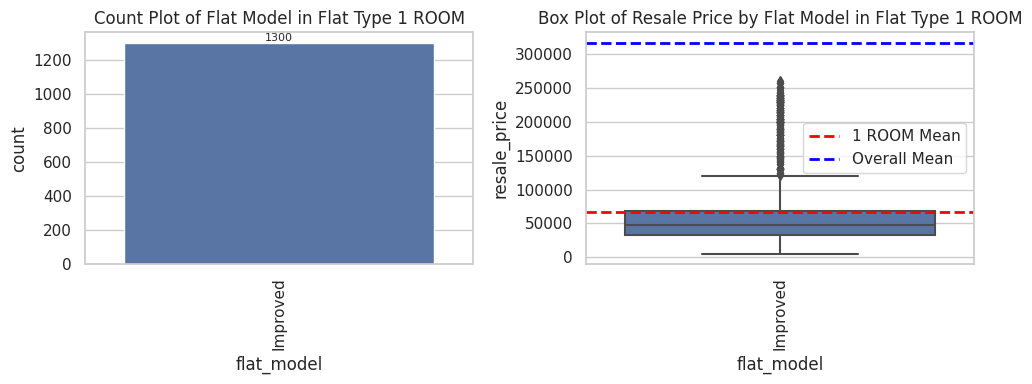

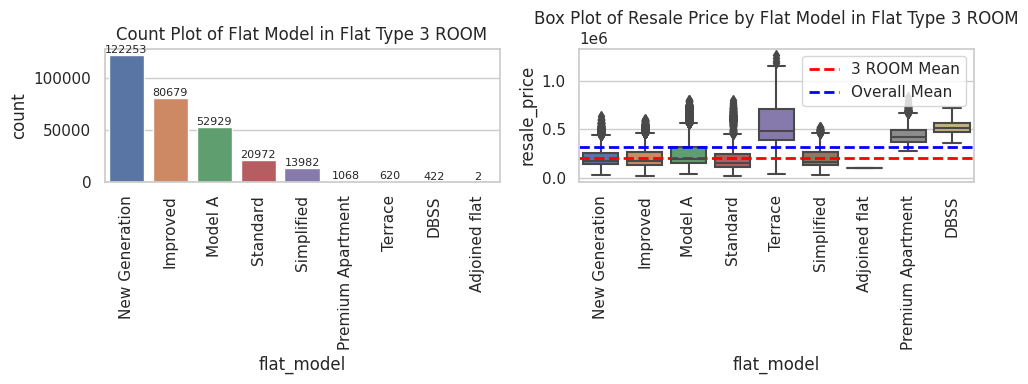

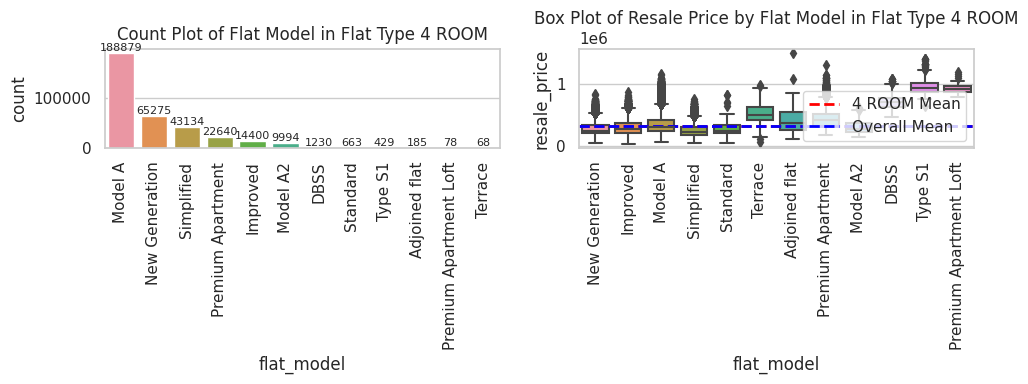

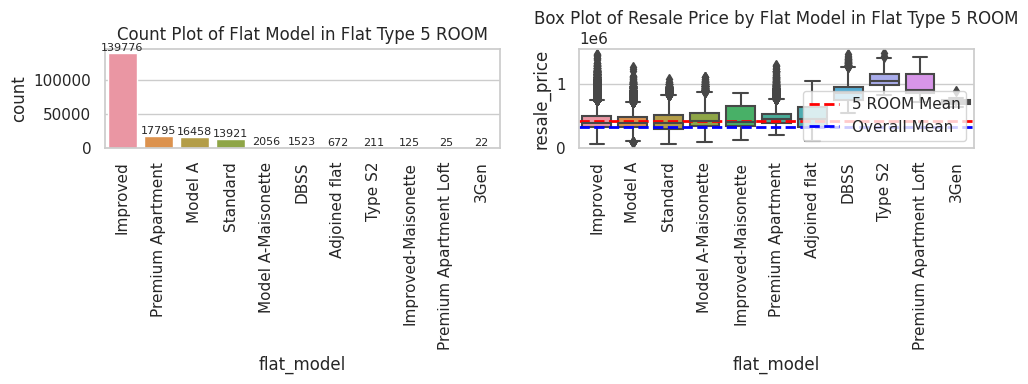

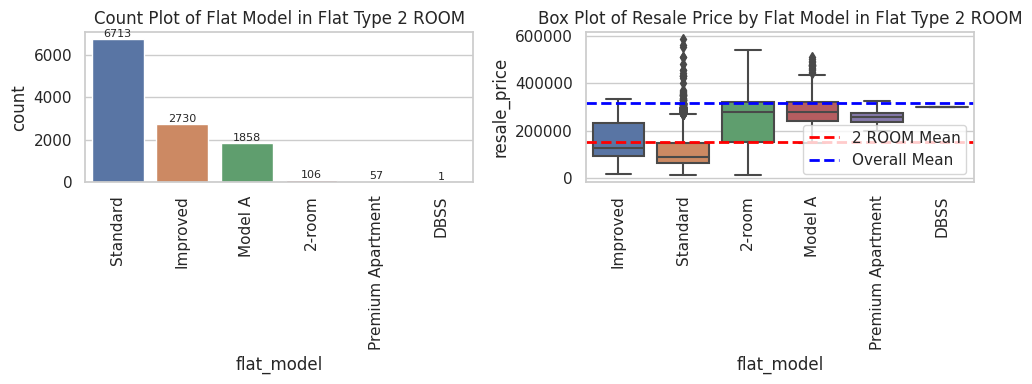

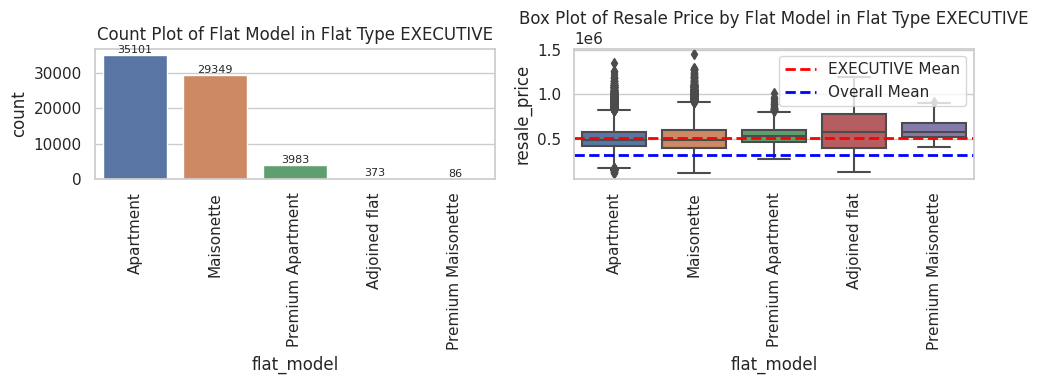

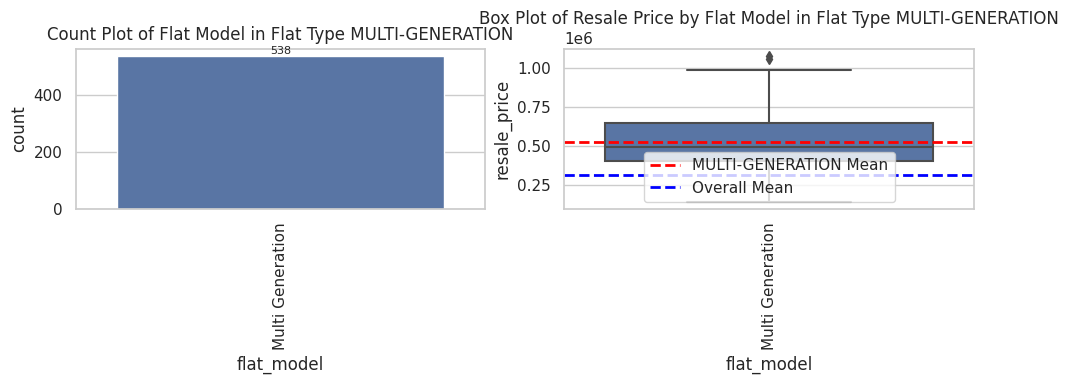

In [17]:

types = data['flat_type'].unique()

for ftype in types:
    plt.figure(figsize=(10, 4))

    # Count plot for flat_type
    plt.subplot(1, 2, 1)
    flat_model_order = data[data['flat_type'] == ftype]['flat_model'].value_counts().index
    count_plot = sns.countplot(x='flat_model', data=data[data['flat_type'] == ftype], order=flat_model_order)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of Flat Model in Flat Type {ftype}')

    # Data labels for count of flat model
    for p in count_plot.patches:
        count = int(p.get_height())
        plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)


    # Box plot for resale_price by flat_type
    plt.subplot(1, 2, 2)
    sns.boxplot(x='flat_model', y='resale_price', data=data[data['flat_type'] == ftype])

    # Mean line for each town in red
    mean_resale_price = data[data['flat_type'] == ftype]['resale_price'].mean()
    plt.axhline(mean_resale_price, color='red', linestyle='dashed', linewidth=2, label=f'{ftype} Mean')

    # Overall mean line in blue
    overall_mean_resale_price = data['resale_price'].mean()
    plt.axhline(overall_mean_resale_price, color='blue', linestyle='dashed', linewidth=2, label='Overall Mean')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of Resale Price by Flat Model in Flat Type {ftype}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [42]:
# Check distribution
def plot(data, column):
  plt.figure(figsize =(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data = data, x= column)
  plt.title(f'Box Plot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data = data, x= column, kde = True, bins = 50)
  plt.title(f'Distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data = data, x= column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

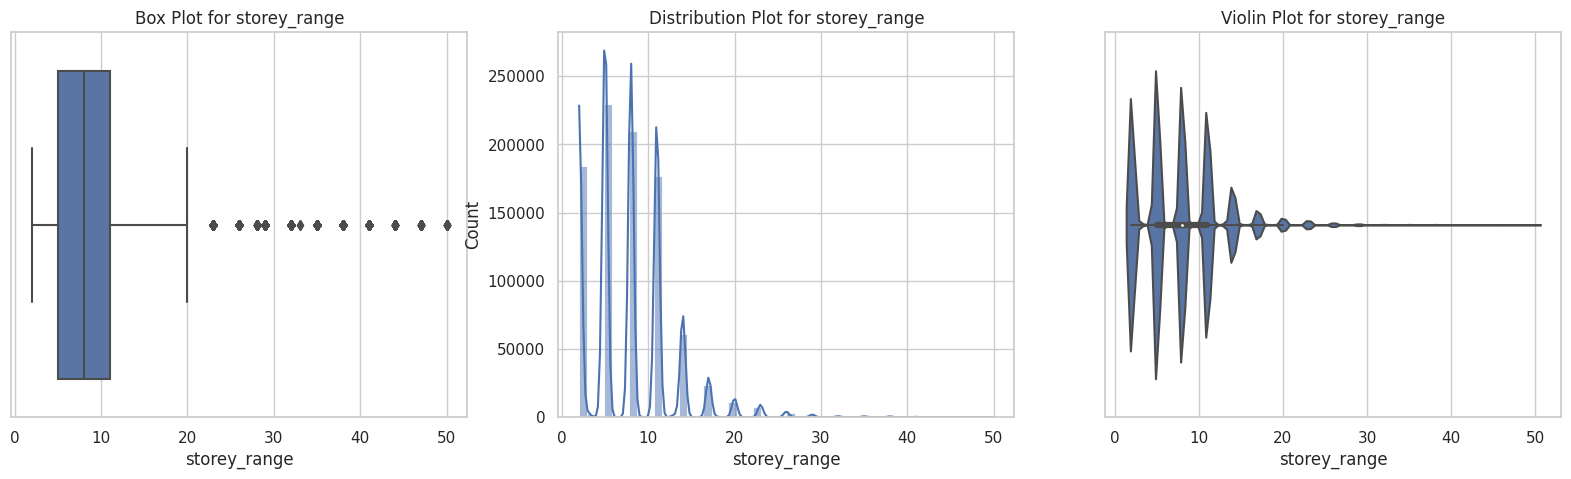

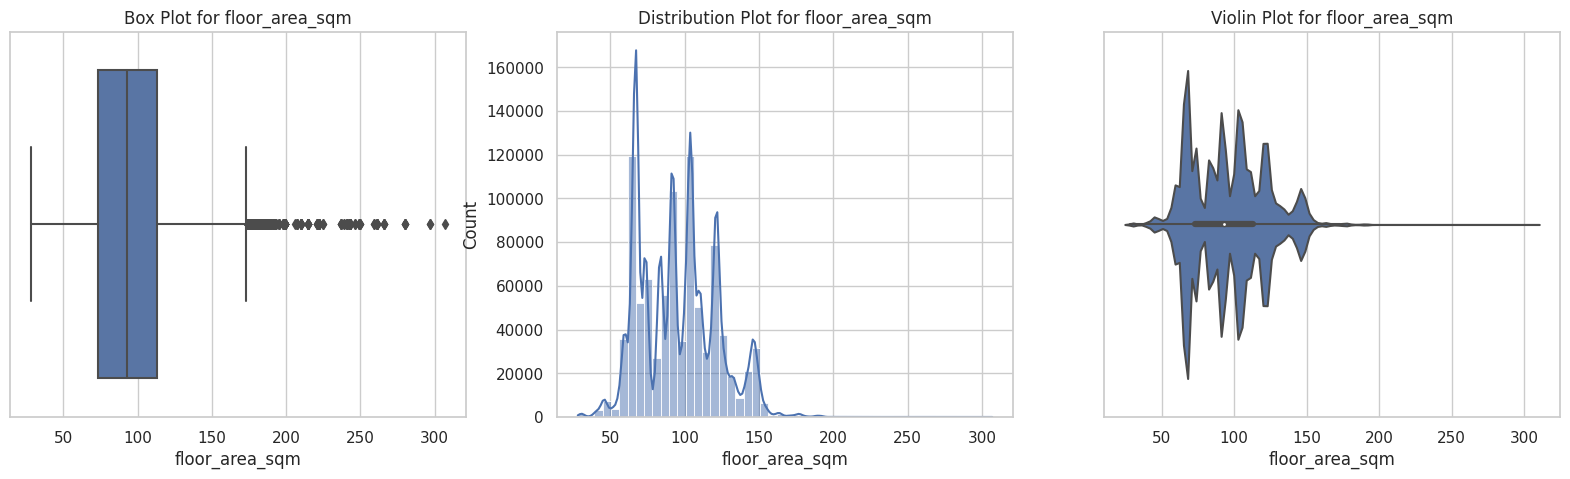

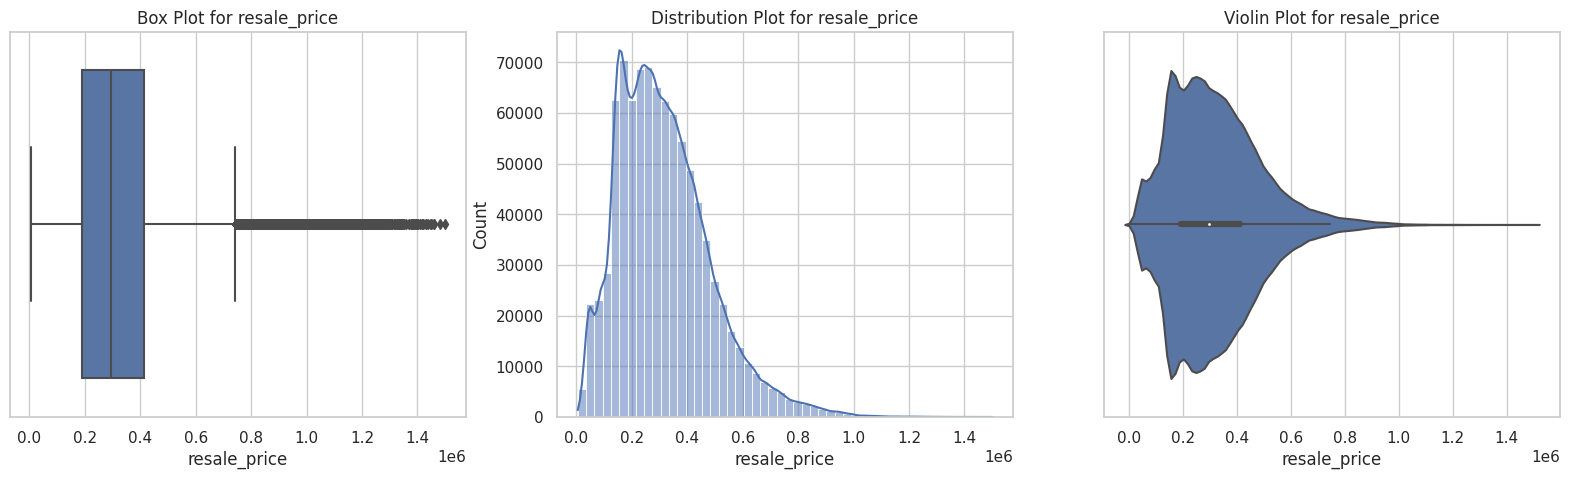

In [43]:
for i in ['storey_range','floor_area_sqm','resale_price']:
  plot(data,i)


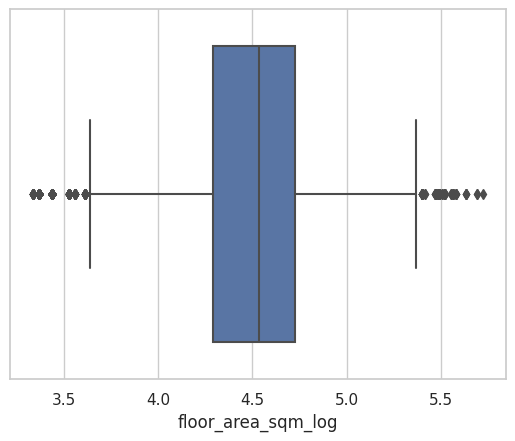

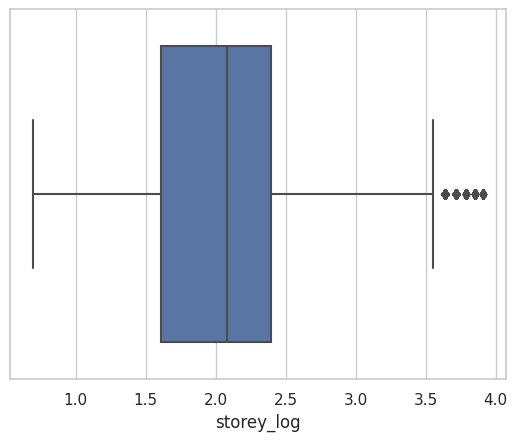

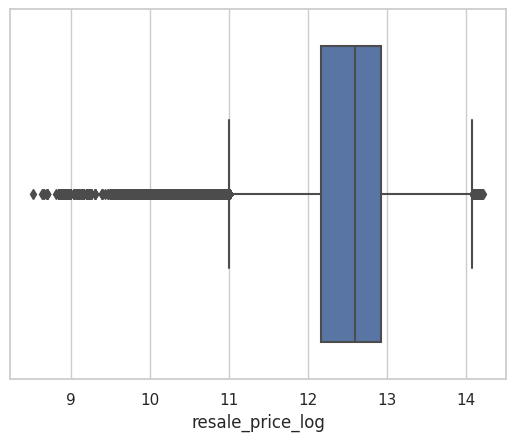

In [18]:


data['floor_area_sqm_log'] = np.log(data['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm_log', data=data)
plt.show()

data['storey_log'] = np.log(data['storey_range'])
sns.boxplot(x='storey_log', data=data)
plt.show()

data['resale_price_log'] = np.log(data['resale_price'])
sns.boxplot(x='resale_price_log', data=data)
plt.show()



In [19]:
#Check outliers

def outlier(data,column):
  IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
  upper = data[column].quantile(0.75) + (1.5*IQR)
  lower = data[column].quantile(0.75) - (1.5*IQR)
  data[column] = data[column].clip(lower, upper)



In [20]:
outlier(data, 'resale_price_log')
outlier(data, 'storey_log')
outlier(data, 'floor_area_sqm_log')


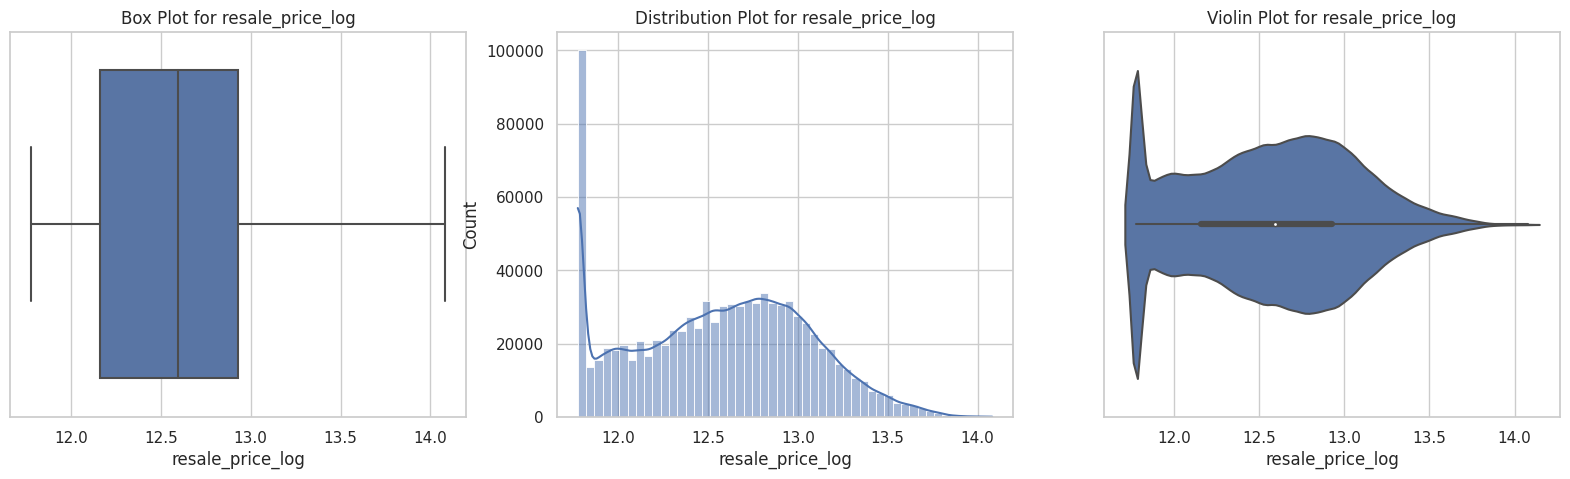

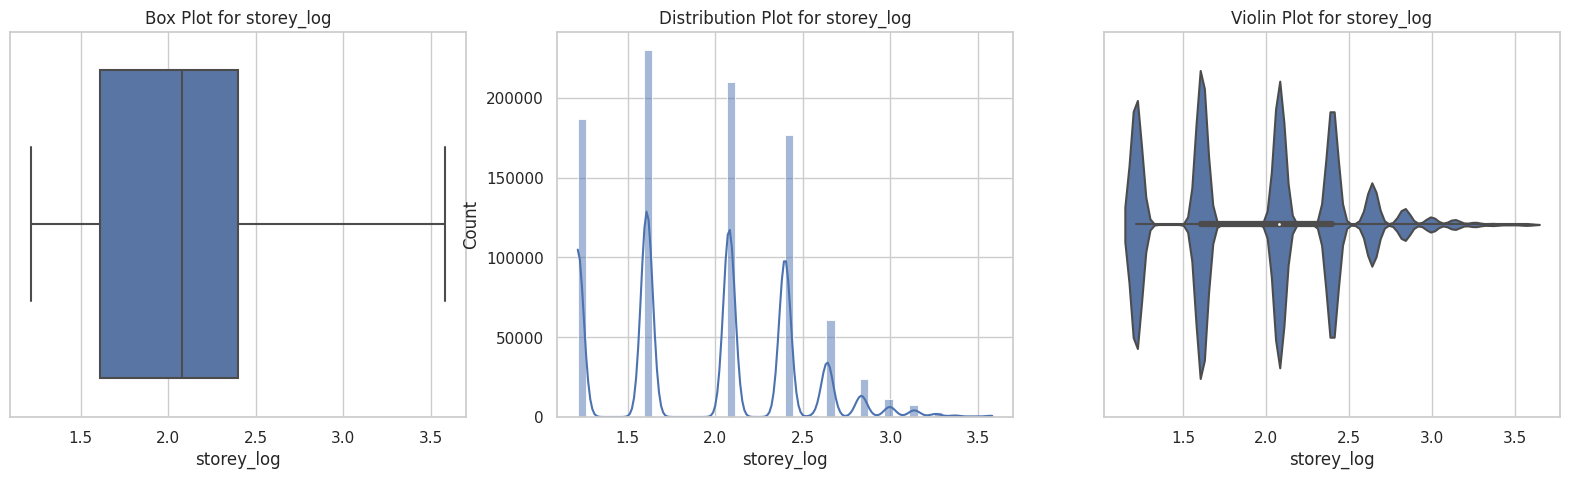

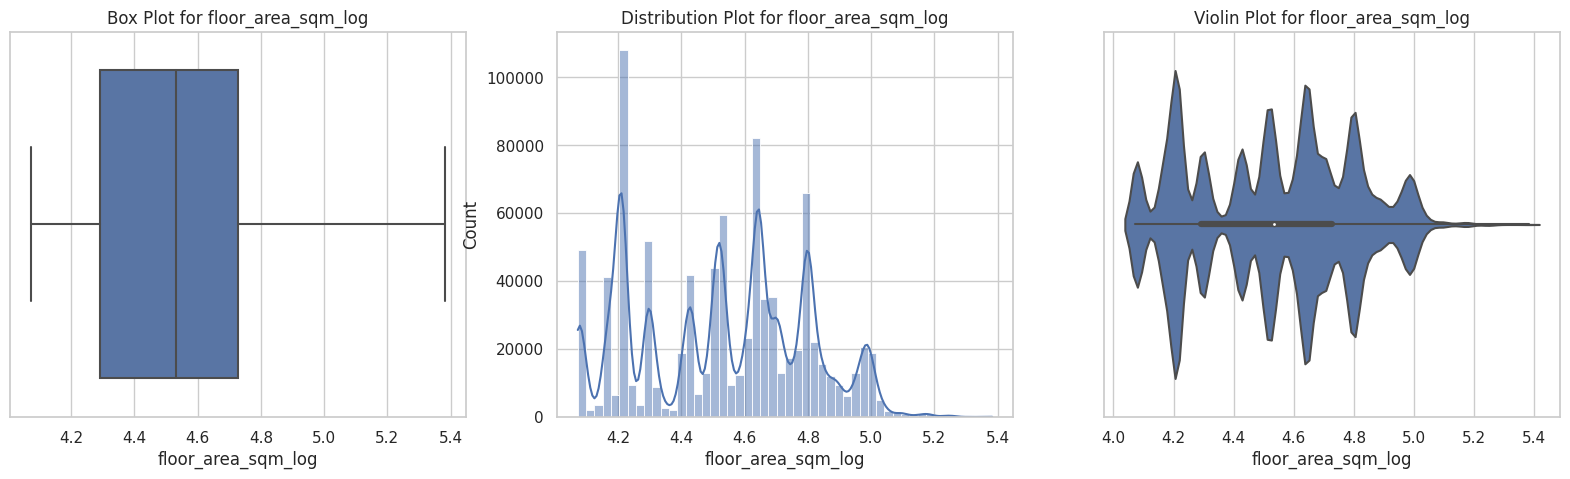

In [49]:
for i in ['resale_price_log','storey_log','floor_area_sqm_log']:
  plot(data,i)

In [21]:
flat = data.drop(columns =['resale_price','storey_range','floor_area_sqm'])
flat.describe().T

count         mean        std          min  \
lease_commence_date  914681.0  1988.139603  10.522351  1966.000000   
floor_area_sqm_log   914681.0     4.528697   0.265410     4.071995   
storey_log           914681.0     1.933362   0.523743     1.215209   
resale_price_log     914681.0    12.560879   0.492590    11.775654   

                             25%          50%          75%          max  
lease_commence_date  1981.000000  1986.000000  1996.000000  2022.000000  
floor_area_sqm_log      4.290459     4.532599     4.727388     5.382780  
storey_log              1.609438     2.079442     2.397895     3.580581  
resale_price_log       12.160029    12.594731    12.928779    14.081904

ANOVA to check relationship between town,flat model, flat type with resale price

In [23]:
import pandas as pd
from scipy.stats import f_oneway

category_columns = ['town', 'flat_model', 'flat_type']
numerical_column = 'resale_price_log'

for category_column in category_columns:
    # Create a list of numerical arrays, each corresponding to a category
    category_groups = [group[numerical_column].values for name, group in flat.groupby(category_column)]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*category_groups)

    # Print results
    print(f"\nANOVA results for {category_column}:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Check if the p-value is significant (e.g., less than 0.05)
    if p_value < 0.05:
        print("Statistically significant - reject the null hypothesis")
    else:
        print("Not statistically significant - Accept the null hypothesis")


ANOVA results for town:
F-statistic: 4365.57578414731
P-value: 0.0
Statistically significant - reject the null hypothesis

ANOVA results for flat_model:
F-statistic: 15225.11494931859
P-value: 0.0
Statistically significant - reject the null hypothesis

ANOVA results for flat_type:
F-statistic: 103744.08261678545
P-value: 0.0
Statistically significant - reject the null hypothesis


Since the mean difference acorss features are different. We can consider the categroical feature for prediction

<Axes: title={'center': 'Correlation Heatmap'}>

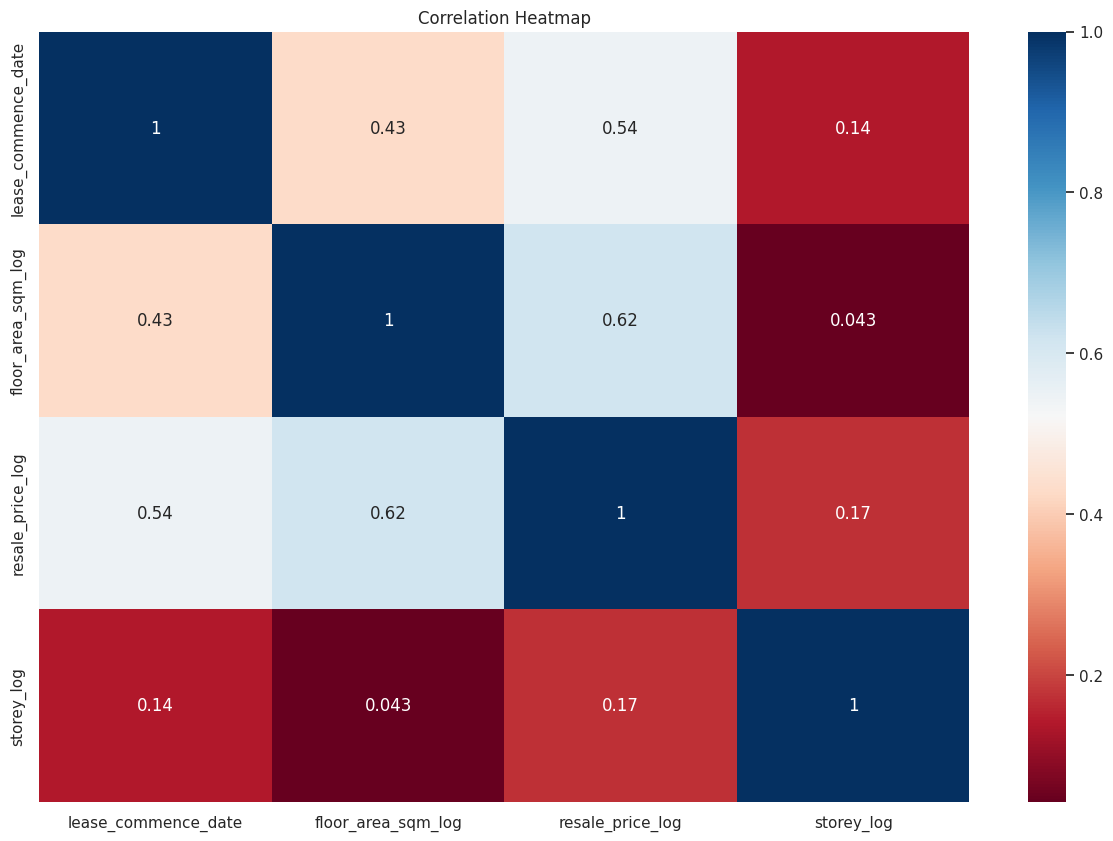

In [51]:


corrMatrix = flat.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

In [ ]:
flat['town'].value_counts()

TAMPINES           79087
YISHUN             69209
BEDOK              66050
JURONG WEST        65771
WOODLANDS          64637
ANG MO KIO         51627
HOUGANG            50031
BUKIT BATOK        43639
CHOA CHU KANG      37749
BUKIT MERAH        33887
PASIR RIS          32910
SENGKANG           31580
TOA PAYOH          31193
QUEENSTOWN         28473
GEYLANG            27928
CLEMENTI           27784
BUKIT PANJANG      27317
KALLANG/WHAMPOA    26813
JURONG EAST        24516
SERANGOON          22625
BISHAN             21108
PUNGGOL            19746
SEMBAWANG          13397
MARINE PARADE       7984
CENTRAL AREA        7070
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
flat['flat_model'].value_counts()

Model A                   260124
Improved                  238885
New Generation            187528
Simplified                 57116
Premium Apartment          45543
Standard                   42269
Apartment                  35101
Maisonette                 29349
Model A2                    9994
DBSS                        3176
Model A-Maisonette          2056
Adjoined flat               1232
Terrace                      688
Multi Generation             538
Type S1                      429
Type S2                      211
Improved-Maisonette          125
2-room                       106
Premium Apartment Loft       103
Premium Maisonette            86
3Gen                          22
Name: flat_model, dtype: int64

In [52]:
final = pd.DataFrame(flat)
final.describe()
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914681 entries, 0 to 168477
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 914681 non-null  object 
 1   flat_type            914681 non-null  object 
 2   flat_model           914681 non-null  object 
 3   lease_commence_date  914681 non-null  int64  
 4   floor_area_sqm_log   914681 non-null  float64
 5   resale_price_log     914681 non-null  float64
 6   storey_log           914681 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.8+ MB


In [25]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables using Label Encoding
lc_town = LabelEncoder()
lc_model = LabelEncoder()
lc_type = LabelEncoder()

flat['town'] = lc_town.fit_transform(flat['town'])
flat['flat_model'] = lc_model.fit_transform(flat['flat_model'])
flat['flat_type'] = lc_type.fit_transform(flat['flat_type'])
flat

town  flat_type  flat_model  lease_commence_date  floor_area_sqm_log  \
0          0          0           5                 1977            4.071995   
1          0          0           5                 1977            4.071995   
2          0          0           5                 1977            4.071995   
3          0          0           5                 1977            4.071995   
4          0          2          12                 1976            4.290459   
...      ...        ...         ...                  ...                 ...   
168473    26          5           3                 1987            4.955827   
168474    26          5           7                 1987            4.983607   
168475    26          5           3                 1987            4.955827   
168476    26          5           3                 1988            4.955827   
168477    26          5           3                 1988            4.955827   

        storey_log  resale_price_log  
0         2.397895         11.775654  
1         1.609438         11.775654  
2         2.397895         11.775654  
3         2.079442         11.775654  
4         1.609438         11.775654  
...            ...               ...  
168473    2.079442         13.578380  
168474    2.397895         13.638773  
168475    2.397895         13.534473  
168476    1.215209         13.567049  
168477    1.215209         13.573439  

[914681 rows x 7 columns]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 20}
Mean squared error: 0.09768100835467898
R-squared: 0.5975099920978187


In [56]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 10.0


In [57]:
ridge_pred = ridge_cv.predict(X_test)

# Calculate model performanceprint('Test R-squared score :', r2_score(y_test, ridge_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,ridge_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,ridge_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,ridge_pred)))
print('Linear Regression score:',ridge_cv.score(X_train,y_train))
print('Test Score: ',ridge_cv.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(ridge_cv, X_train, y_train, cv=5).mean())

Mean Squared Error:  0.12030938651520784
Mean Absolute Error:  0.28146248911087085
Root Mean Squared Error:  0.3468564350206117
Linear Regression score: 0.5032413199422381
Test Score:  0.5042708224981886
Cross Validation Score: 0.5032221554692183


In [59]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
knr = KNeighborsRegressor()

# hyperparameters
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(1,10),
              'metric':['euclidean','manhattan']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=knr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)




Best hyperparameters: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}
Mean squared error: 0.10914230025483432
R-squared: 0.5502842770364759


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
rf = RandomForestRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


KeyboardInterrupt: 

BEST MODEL

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat.drop(['resale_price_log'],axis =1)
y = flat['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
xgbr = xgb.XGBRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': np.linspace(0.06, 0.069, 30),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
xgb_bestmodel = rsc.best_estimator_
y_pred = xgb_bestmodel.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)



Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.06651724137931035}
Mean squared error: 0.09563621592685245
R-squared: 0.6059354632748348


In [31]:
# Saving the model
import pickle
with open('xgbmodel.pkl', 'wb') as file:
    pickle.dump(xgb_bestmodel, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('lc_town.pkl','wb') as f:
    pickle.dump(lc_town, f)
with open('lc_model.pkl','wb') as f:
    pickle.dump(lc_model, f)
with open('lc_type.pkl','wb') as f:
    pickle.dump(lc_type, f)

OTHER METHOD

In [6]:
data1 = df_new.drop(['block','street_name','month',],axis =1)
data1

data1['flat_model'] = data1['flat_model'].replace({
    'MODEL A':'Model A',
    'IMPROVED': 'Improved',
    'NEW GENERATION': 'New Generation',
    'SIMPLIFIED': 'Simplified',
    'APARTMENT': 'Apartment',
    'STANDARD': 'Standard',
    'MAISONETTE': 'Maisonette',
    'MODEL A-MAISONETTE': 'Model A-Maisonette',
    'TERRACE': 'Terrace',
    'MULTI GENERATION': 'Multi Generation',
    '2-ROOM': '2-room',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'IMPROVED-MAISONETTE': 'Improved-Maisonette'
})

data1['flat_type'] = data1['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

data1['storey_range'] = data1['storey_range'].apply(lambda x:((int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2))

data1['storey_range'].value_counts()
data1.describe()


storey_range  floor_area_sqm  lease_commence_date  resale_price
count  914681.000000   914681.000000        914681.000000  9.146810e+05
mean        7.676387       95.697147          1988.139603  3.170377e+05
std         4.805656       25.849534            10.522351  1.672348e+05
min         2.000000       28.000000          1966.000000  5.000000e+03
25%         5.000000       73.000000          1981.000000  1.910000e+05
50%         8.000000       93.000000          1986.000000  2.950000e+05
75%        11.000000      113.000000          1996.000000  4.120000e+05
max        50.000000      307.000000          2022.000000  1.500000e+06

In [7]:
data1['flat_type'].value_counts()

4 ROOM              346975
3 ROOM              292927
5 ROOM              192584
EXECUTIVE            68892
2 ROOM               11465
1 ROOM                1300
MULTI-GENERATION       538
Name: flat_type, dtype: int64

In [70]:
data1['flat_model'].value_counts()

Model A                   260124
Improved                  238885
New Generation            187528
Simplified                 57116
Premium Apartment          45543
Standard                   42269
Apartment                  35101
Maisonette                 29349
Model A2                    9994
DBSS                        3176
Model A-Maisonette          2056
Adjoined flat               1232
Terrace                      688
Multi Generation             538
Type S1                      429
Type S2                      211
Improved-Maisonette          125
2-room                       106
Premium Apartment Loft       103
Premium Maisonette            86
3Gen                          22
Name: flat_model, dtype: int64

In [71]:
data1['town'].value_counts()

TAMPINES           79087
YISHUN             69209
BEDOK              66050
JURONG WEST        65771
WOODLANDS          64637
ANG MO KIO         51627
HOUGANG            50031
BUKIT BATOK        43639
CHOA CHU KANG      37749
BUKIT MERAH        33887
PASIR RIS          32910
SENGKANG           31580
TOA PAYOH          31193
QUEENSTOWN         28473
GEYLANG            27928
CLEMENTI           27784
BUKIT PANJANG      27317
KALLANG/WHAMPOA    26813
JURONG EAST        24516
SERANGOON          22625
BISHAN             21108
PUNGGOL            19746
SEMBAWANG          13397
MARINE PARADE       7984
CENTRAL AREA        7070
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: town, dtype: int64

Lets try grouping for features variables which is low in number

In [8]:
data1['flat_model'] = data1['flat_model'].replace({
    'Type S2':'Others',
    'Type S1': 'Others',
    'Improved-Maisonette':'Others',
    '2-room':'Others',
    'Premium Apartment Loft': 'Others',
    'Premium Maisonette': 'Others',
    '3Gen': 'Others'
})

data1['flat_type'] = data1['flat_type'].replace({'MULTI-GENERATION': 'Others','1 ROOM': 'Others'})

data1['town']= data1['town'].replace({'BUKIT TIMAH': 'OTHERS','LIM CHU KANG': 'OTHERS'})

In [75]:
data1

town  flat_type  storey_range  floor_area_sqm      flat_model  \
0       ANG MO KIO     Others          11.0            31.0        Improved   
1       ANG MO KIO     Others           5.0            31.0        Improved   
2       ANG MO KIO     Others          11.0            31.0        Improved   
3       ANG MO KIO     Others           8.0            31.0        Improved   
4       ANG MO KIO     3 ROOM           5.0            73.0  New Generation   
...            ...        ...           ...             ...             ...   
168473      YISHUN  EXECUTIVE           8.0           142.0       Apartment   
168474      YISHUN  EXECUTIVE          11.0           146.0      Maisonette   
168475      YISHUN  EXECUTIVE          11.0           142.0       Apartment   
168476      YISHUN  EXECUTIVE           2.0           142.0       Apartment   
168477      YISHUN  EXECUTIVE           2.0           142.0       Apartment   

        lease_commence_date  resale_price  
0                      1977        9000.0  
1                      1977        6000.0  
2                      1977        8000.0  
3                      1977        6000.0  
4                      1976       47200.0  
...                     ...           ...  
168473                 1987      788888.0  
168474                 1987      838000.0  
168475                 1987      755000.0  
168476                 1988      780000.0  
168477                 1988      785000.0  

[914681 rows x 7 columns]

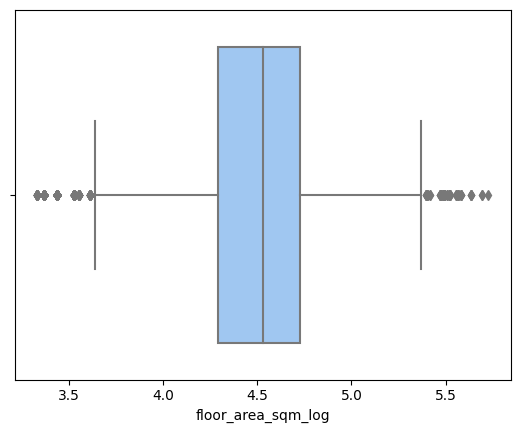

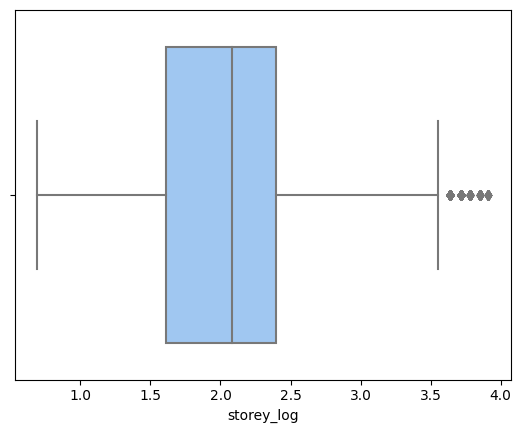

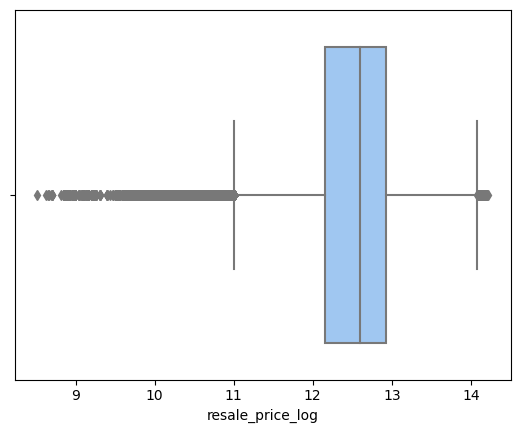

In [9]:

data1['floor_area_sqm_log'] = np.log(data1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm_log', data=data1)
plt.show()

data1['storey_log'] = np.log(data1['storey_range'])
sns.boxplot(x='storey_log', data=data1)
plt.show()


data1['resale_price_log'] = np.log(data1['resale_price'])
sns.boxplot(x='resale_price_log', data=data1)
plt.show()


In [10]:
#Check outliers

def outlier(data,column):
  IQR = data1[column].quantile(0.75) - data1[column].quantile(0.25)
  upper = data1[column].quantile(0.75) + (1.5*IQR)
  lower = data1[column].quantile(0.75) - (1.5*IQR)
  data1[column] = data1[column].clip(lower, upper)


outlier(data1, 'resale_price_log')
outlier(data1, 'storey_log')
outlier(data1, 'floor_area_sqm_log')



In [11]:
flat1 = data1.drop(columns =['resale_price','storey_range','floor_area_sqm'])
flat1.describe().T

final1 = pd.DataFrame(flat1)
final1.describe()
final1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 914681 entries, 0 to 168477
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 914681 non-null  object 
 1   flat_type            914681 non-null  object 
 2   flat_model           914681 non-null  object 
 3   lease_commence_date  914681 non-null  int64  
 4   floor_area_sqm_log   914681 non-null  float64
 5   storey_log           914681 non-null  float64
 6   resale_price_log     914681 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.8+ MB


In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables using Label Encoding
lc_town = LabelEncoder()
lc_model = LabelEncoder()
lc_type = LabelEncoder()

flat1['town'] = lc_town.fit_transform(flat1['town'])
flat1['flat_model'] = lc_model.fit_transform(flat1['flat_model'])
flat1['flat_type'] = lc_type.fit_transform(flat1['flat_type'])
flat1


town  flat_type  flat_model  lease_commence_date  floor_area_sqm_log  \
0          0          5           3                 1977            4.071995   
1          0          5           3                 1977            4.071995   
2          0          5           3                 1977            4.071995   
3          0          5           3                 1977            4.071995   
4          0          1           9                 1976            4.290459   
...      ...        ...         ...                  ...                 ...   
168473    25          4           1                 1987            4.955827   
168474    25          4           4                 1987            4.983607   
168475    25          4           1                 1987            4.955827   
168476    25          4           1                 1988            4.955827   
168477    25          4           1                 1988            4.955827   

        storey_log  resale_price_log  
0         2.397895         11.775654  
1         1.609438         11.775654  
2         2.397895         11.775654  
3         2.079442         11.775654  
4         1.609438         11.775654  
...            ...               ...  
168473    2.079442         13.578380  
168474    2.397895         13.638773  
168475    2.397895         13.534473  
168476    1.215209         13.567049  
168477    1.215209         13.573439  

[914681 rows x 7 columns]

In [83]:
flat1['flat_model'].value_counts()

5     260124
3     238885
9     187528
12     57116
11     45543
13     42269
1      35101
4      29349
7       9994
2       3176
6       2056
0       1232
10      1082
14       688
8        538
Name: flat_model, dtype: int64

<Axes: title={'center': 'Correlation Heatmap'}>

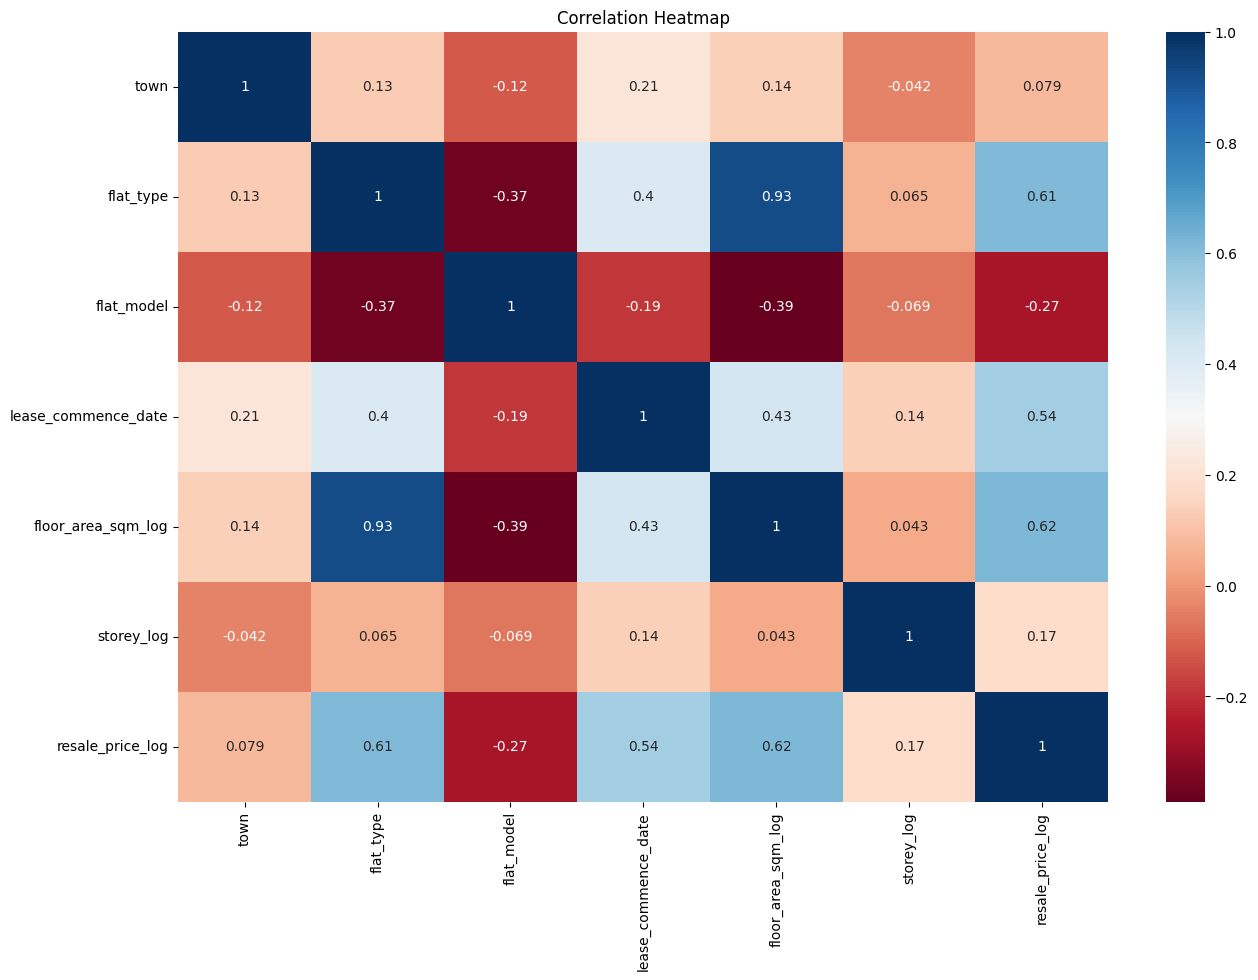

In [15]:


corrMatrix = flat1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

Grouping did not help much in improving the performance

In [84]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat1.drop(['resale_price_log'],axis =1)
y = flat1['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
reg = xgb.XGBRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': np.linspace(0.06, 0.069, 30),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)



Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.06682758620689655}
Mean squared error: 0.09565149544649049
R-squared: 0.6058725047316806


In [20]:
flat2 = flat1.drop(columns=['floor_area_sqm_log'], axis=1)
flat2

town  flat_type  flat_model  lease_commence_date  storey_log  \
0          0          5           3                 1977    2.397895   
1          0          5           3                 1977    1.609438   
2          0          5           3                 1977    2.397895   
3          0          5           3                 1977    2.079442   
4          0          1           9                 1976    1.609438   
...      ...        ...         ...                  ...         ...   
168473    25          4           1                 1987    2.079442   
168474    25          4           4                 1987    2.397895   
168475    25          4           1                 1987    2.397895   
168476    25          4           1                 1988    1.215209   
168477    25          4           1                 1988    1.215209   

        resale_price_log  
0              11.775654  
1              11.775654  
2              11.775654  
3              11.775654  
4              11.775654  
...                  ...  
168473         13.578380  
168474         13.638773  
168475         13.534473  
168476         13.567049  
168477         13.573439  

[914681 rows x 6 columns]

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = flat2.drop(['resale_price_log'],axis =1)
y = flat2['resale_price_log']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
reg = xgb.XGBRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': np.linspace(0.06, 0.069, 30),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)



Best hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.060620689655172415}
Mean squared error: 0.09642905101110189
R-squared: 0.6026686235410966
